
<font color='#9bic31'>

<div style="text-align: center"> 
    
<center> <h1>Wind Farm Layout Optimization</h1> </center>

</div>

</font>

In [171]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" id="search" value="Click Here to Toggle On/Off the Raw Code Cells in the Notebook."  style="height:50px; width:988px" /></form>''' )

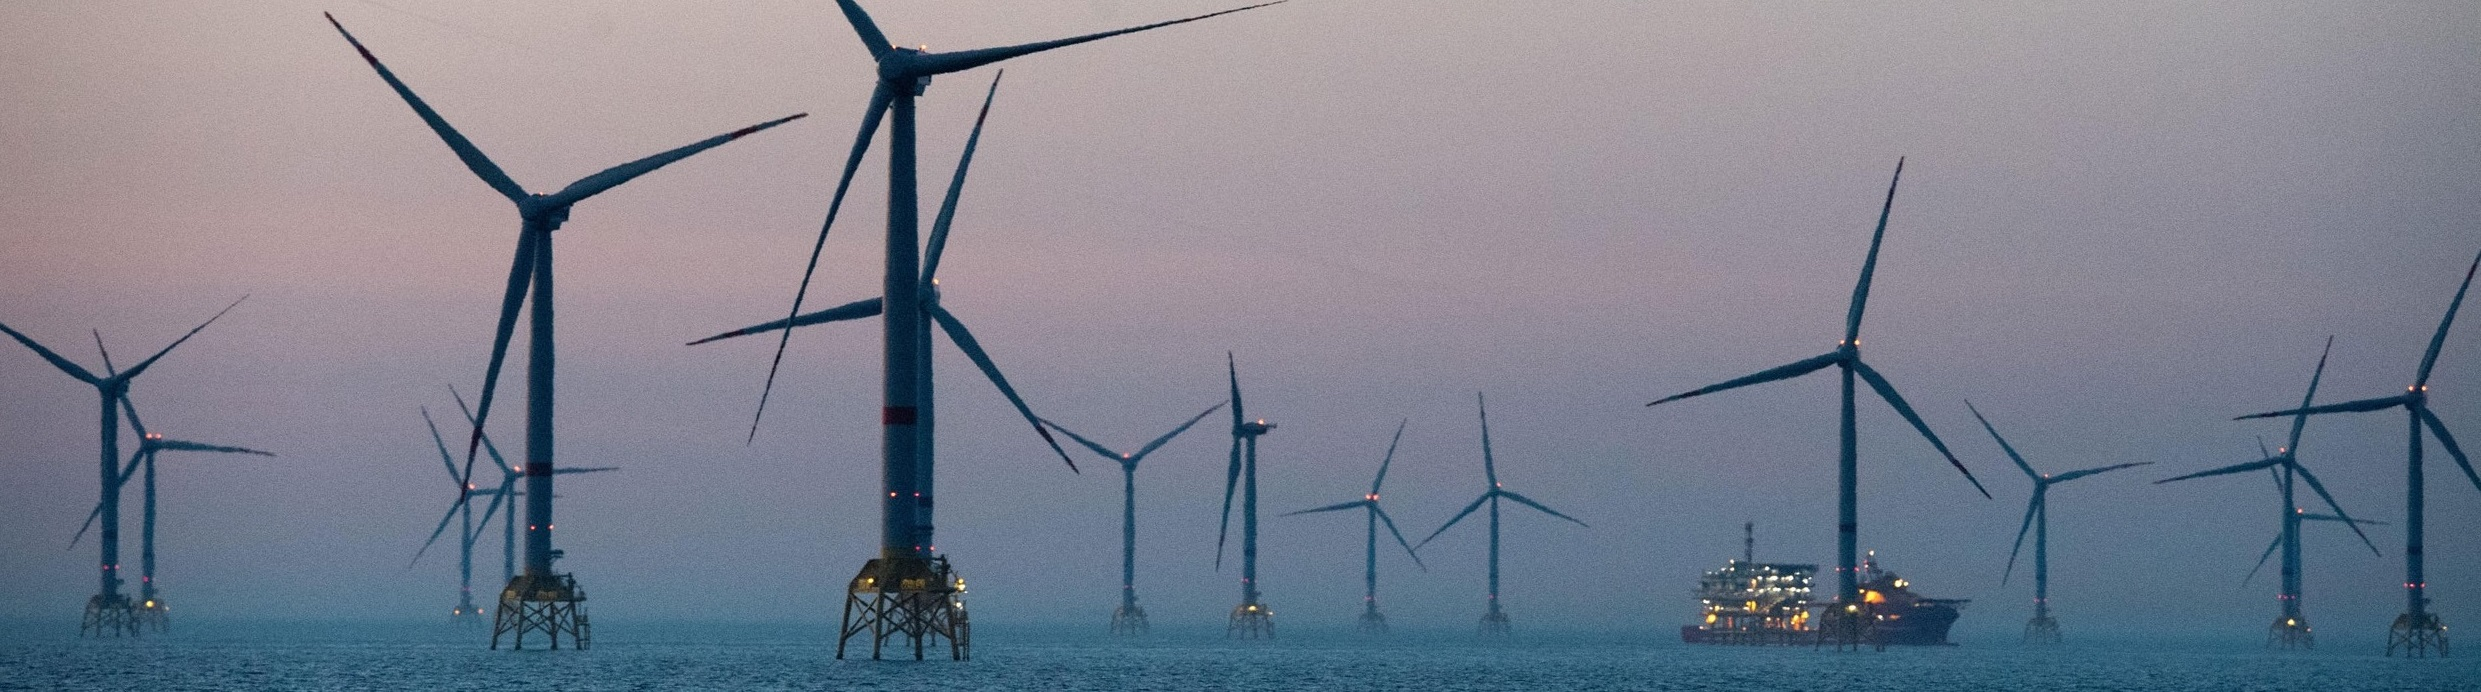

In [431]:
r'''Load Packages'''

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import matplotlib.cm as cm

import warnings
warnings.filterwarnings('ignore')

## Table of Contents
1. [Introduction](#Introduction)
2. [Problem Statement](#Problem-Statement)
3. [Wind Resource Data](#Wind-Resource-Data)
    1. [Data Collection](#Data-Collection)
    2. [Sample Data](#Sample-Data)
        1. [Cleaning Dataset](#Cleaning-Dataset)
        2. [Wind Direction Distribution](#Wind-Direction-Distribution)
        3. [Wind Speed Distribution](#Wind-Speed-Distribution)
        4. [Windrose Diagram](#Windrose-Diagram)
4. [Jensen Point Top-hat Model](#Jensen-Point-Top-hat-Model)
    1. [Combining Multiple Wakes](#Combining-Multiple-Wakes)



<style>
.text_cell_render {
font-family: Times New Roman, serif;
}
</style>

# Notes
- Two of the key parameters in wind farm design are the annual energy production (AEP) and levelized cost of energy (LCOE). In wind farm optimization we search for the maximum AEP while minimizing the LCOE. |
- LCOE which accounts for the capital cost, operational and maintenance (O&M) cost
- However, grouping turbines in such a farm introduces two major issues; 1. a wind turbine operating in the wake of another turbine has a reduced power production (because of a lower incident wind speed), and 2. it shortens the lifetime of the rotors due to increased dynamic loads (because of an increased turbulence intensity)
- For full wake conditions power losses of downstream turbines can be 30-40%, but when averaged over different wind directions, power losses in the range 5-15% have been
- Velocity and turbulence intensity are the two most important flow features that determine the AEP
- However, the simplicity and low computational cost associated with semi-analytical models make them appealing for wind farm optimization purposes [6] [7]. These lower order models are able to capture the essential physics of the wake while remaining of practical relevance for their integration in wind farm topology optimization tool

- Modelling Assumptions
- uniform free stream inflow velocity, 𝑢∞ and uniform ambient turbulence intensity, 𝐼𝑎.
- Neutrally stable atmospheric boundary layer. No shear.
- Turbine characteristics consists of rotor diameter 𝐷𝑑, hub height ℎ𝐻, power and power coefficient curve 𝑃(𝑢) and 𝐶𝑃(𝑢), and thrust coefficient curve 𝐶𝑇(𝑢).


- However, the change in turbulence intensity is not considered in analytic far wake models.
- In the Jensen Model, the effect of turbulence is introduced by a prescribed wake decay constant.
- 2D models consider both variations in axial and radial direction, like Schlichting, Larsen, Bastankhah & Porté-Agel and Ishihara model. They assume a self-similar solution for the velocity deficit in radial direction.

- Motivatgion for Jensen-Katic:  Because the thrust coefficient of a turbine normally is dependent on the wind speed, the initial velocity deficit will alBa be,
- In jensen Katic the effect of turbulence is introduced by a prescribed wake decay constant.
- The Jensen model, also referred to as the Park model, is the wake model implemented in the
most commercial software packages, like WAsP, in WindSim, in WindFarmer, in OpenWind.
- Generally by Jensen's model we mean the Katic modification of it and is also known as PARK model. 
- ?? Perhaps sinosoidal modification is generally not adopted. In a farm level analysis of the wake effects this difference might not be too important as the regions of over- and under-estimation may cancel.
- In a farm level analysis of the wake effects this difference might not be too important as the regions of over- and under-estimation may cancel.
- Tian takes original Jensen's model and modifies it. 
- Stated. Except for the hat-shaped Jensen and Frandsen models, the wake expansion curve has
little impact on the power production calculations. So, Jensen original is not that good. PARK is good.

- Check out this video. https://www.youtube.com/watch?v=clNHQIg_5po. has a nice objective function visualization scheme. 
- AEP Calculations depend on the bin resolution ?? Right??
- Bin sizes are typically defined by the wind resource data provided.
In general, historically, 30deg bins were used, though it is recognized that this is too course, and 10deg (or even 5deg) is needed to capture the most relevant directional sensitivities.
Wind speed is typically binned by 1m/s.
- typically the
minimum distance between turbines is around four or five rotor diameters.
-  In the case of wind farm spacing, turbines need to be at least 7 rotor diameters away from each other.


## 1. Introduction
An unoptimized or suboptimal layout of wind turbines in a wind farm can typically cost upto 10-15% of AEP (Annual Evergy Production), which will make the wind farm owner lose a large sum of money. This primarily happens due to the aggregated influence of arranged wind turbines on the wind speed and direction. This inter-turbine interference is known as wake effect. 

Therefore, optimal layout of wind turbines in a wind farm carry huge business importance. Simultaneously, it also has the potential to steer the energy portfolio further towards sustainability and cleaner energy.
Optimizing the layout of a wind farm in an interesting and complex optimization problem. The principal challenge arises due to the discontinuous nature of the search space induced by the wake effect of the turbines. Hence, optimizing the layout analytically is difficult. Although, off-the-shelf algorithms to solve the problem exist (typically based on stochastic or heuristic methods), newer models to evaluate a farm layout and newer constraints emerge, demanding more sophistication from the algorithms. 


## 2. Problem Statement. 
In this hackathon, your challenge is to optimize the placement of wind turbines and their number [we can include a term in objective function that additionally penalizes layout with a greater number of turbines, thus favoring layout with lesser turbines] (fix the number of turbines ..fixed capital costs) on a hypothetical 2D onshore wind farm area. The wind farm area is rectangular in shape with dimensions: length Lx = 5 km, width Ly = 5 km. Precisely, your goal is to maximize the AEP. You are required to assume that all the turbines have same specifications i.e. turbine type, turbine height, rotor radius, rated power, rated wind speed etc.  Cable network optimization etc. are not a part of this challenge and should not considered. [Need to add objective function equation]
For your purpose, we provide to you the relevant data for (i) wind conditions over a period of time – wind resource data, (ii) turbine specidication data – turbine data. The description of these datasets is provided below. 
 

## 3. Wind Resource Data. 
We provide to you a certain section of a large volume actual wind resource data. This data is gathered at a location (intentionally kept anonymous) from 2014 to 2016. The data was collected at 100 m height from MSL (Mean Sea Level). This is relevant, because the typical height of onshore wind turbines varies between 75 m to 110 m. Wind speed (m/s) is measured using anemometer and wind direction (degrees) is measured using wind vane. The data are recorded for every 10 minutes throughout the year. You can visualize the distribution of the data by creating wind rose diagrams, with appropriate size of wind speed and wind directions bins. 

You will be having the data for the year 2014 and 2015 with you. The former subset you can use for your model development and testing, while the scores on later subest will decide the leaderboard positions. Note that, during testing, in order to make your models more robust, you are naturally allowed to explore the other available datasets that you can find by yourself. 
Untimately the winners will be decided based on the best achieved AEP number on the unseen test dataset, which is for the year 2016 and will be kept throughout with us. 





### 3.1 Data Collection
How is Wind Data collected? 
In general, wind measurements are collected by wind vanes and wind-cup anemometers, which are normally mounted on a mast. Some kind of monitoring instrumental setup is typically used for continuos data collection. Still, data losses can occur due to power failures and water ingress. Although while recording wind data, temperature and air pressure are also generally recorded, but for our purpose, for a given location and a given height, we simply need values of two variables: average wind speed and average direction. Wind speed is measured in mph and direction is measured in degress clockwise w.r.t North (zero). <br>
We will solve our problem for the offshore case i.e. we assume that wind is generally equally distributed. <br>
[Wind Data Source](https://mesonet.agron.iastate.edu/request/download.phtml?network=IN__ASOS#)

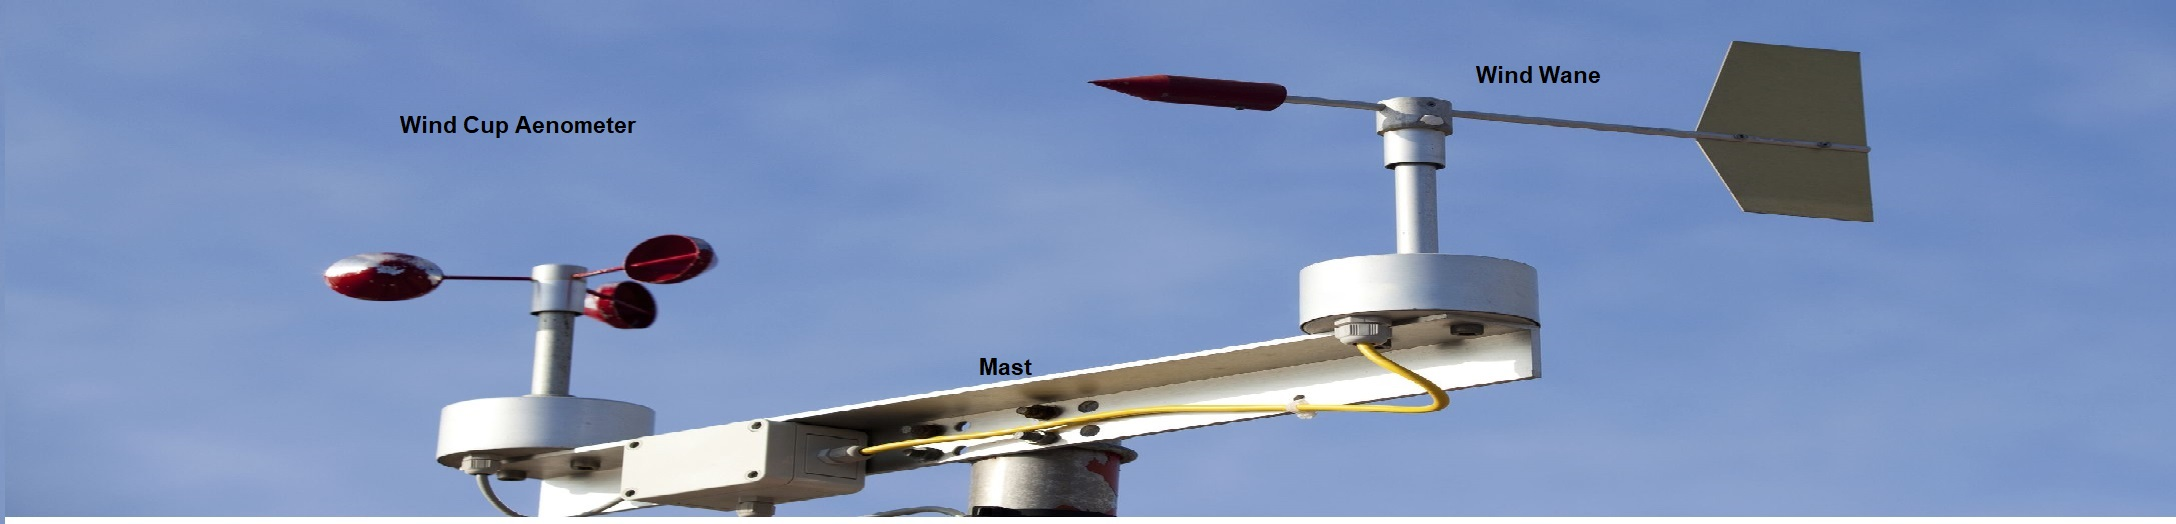

### 3.2 Sample Data

In [77]:
r'''Display helper function'''
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [78]:
# near uniform data in nequen, sancarlos, riogallegos

In [385]:
df = pd.read_csv(r'C:\Users\Nitin.N.Singh\Desktop\HACK\Jupyter\Data\benbecula_asos.txt')

for cols in df.columns[2:]:
    df[cols] = pd.to_numeric(df[cols],errors='coerce')

print('Shape of the dataframe is ', df.shape)
print('Columns in the dataframe are ', df.columns.tolist())

print('\nBelow we show the head and tail of the dataframe.')
print('We have the data for the whole year')
print('The data appears to be recorded regularly at 30 minute interval')
display_side_by_side(df.head(10), pd.DataFrame(), df.tail(10))

Shape of the dataframe is  (16876, 4)
Columns in the dataframe are  ['station', 'valid', 'drct', 'sped']

Below we show the head and tail of the dataframe.
We have the data for the whole year
The data appears to be recorded regularly at 30 minute interval


,station,valid,drct,sped
0,EGPL,2008-01-01 00:20,120.0,8.05
1,EGPL,2008-01-01 00:50,140.0,8.05
2,EGPL,2008-01-01 01:20,150.0,9.20
3,EGPL,2008-01-01 01:50,160.0,10.35
4,EGPL,2008-01-01 02:20,150.0,9.20
5,EGPL,2008-01-01 02:50,150.0,9.20
6,EGPL,2008-01-01 03:20,140.0,9.20
7,EGPL,2008-01-01 03:50,130.0,9.20
8,EGPL,2008-01-01 04:20,150.0,13.80
9,EGPL,2008-01-01 04:50,140.0,12.65


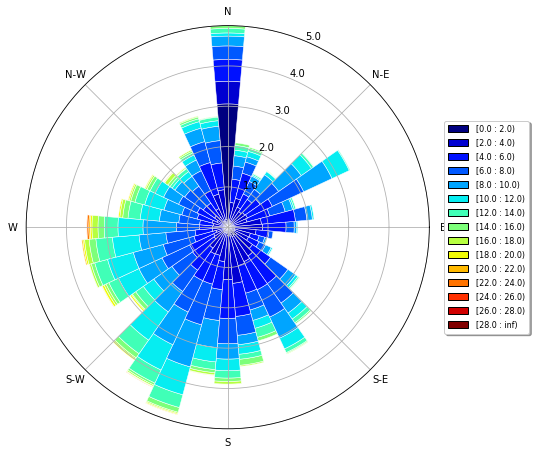

In [409]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax(fig=plt.figure(figsize=(7,7)))
ax.bar(df['drct'], 0.447*df['sped'], nsector = 36, normed=True, bins=np.arange(0, 30, 2), opening=1, 
       edgecolor='w', lw = 0.50)

ax.set_legend(loc="right",borderaxespad = -10, shadow = True)#; plt.show()
# plt.legend()
# ax.text(1e5,0,'nitn')
# plt.savefig(r'C:\Users\Nitin.N.Singh\Desktop\HACK\Jupyter\Images\Windroses\riogallegos19.png')

In [95]:
100**0.16

2.0892961308540396

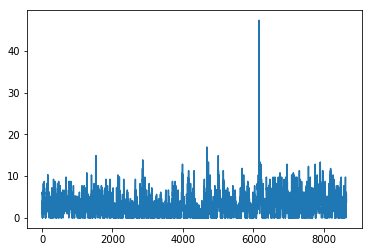

In [407]:
plt.plot(0.447*df['sped'])

In [44]:
print('Check column data type \n')
df.info()

Check column data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8631 entries, 0 to 8630
Data columns (total 4 columns):
station    8631 non-null object
valid      8631 non-null object
drct       8310 non-null float64
sped       8629 non-null float64
dtypes: float64(2), object(2)
memory usage: 269.8+ KB


#### 3.2.1 Cleaning Dataset
Do the columns contatin Nan Values?

In [452]:
print('Check which columns contain Nan values?')
df.isna().any()

Check which columns contain Nan values?


station    False
valid      False
drct        True
sped       False
dtype: bool

In [306]:
print('Index of direction column that contatin Nan Values: ')
idx_drctNan = df['drct'].index[df['drct'].apply(np.isnan)]
idx_drctNan

Index of direction column that contatin Nan Values: 


Int64Index([1301, 1457, 1668, 1743, 1816, 1884, 2873, 2874, 3151, 3180, 3445,
            3606, 3611, 3672, 3738, 3966, 4430, 4439, 4453, 4455, 4459, 5303,
            5448, 5831, 5956, 6075, 6124, 6138, 6301, 6404, 6849, 7021, 7644,
            7917, 8411],
           dtype='int64')

In [307]:
print('Index of speed column that contatin Nan Values: ')
idx_spedNan = df['sped'].index[df['sped'].apply(np.isnan)]
idx_spedNan

Index of speed column that contatin Nan Values: 


Int64Index([1301], dtype='int64')

In [308]:
idx_toFilter = list(set(idx_drctNan.tolist() + idx_spedNan.tolist()))
print('Filter out these {0} rows and reset index of dataframe'.format(len(idx_toFilter)))
df1 = df.drop(df.index[idx_toFilter]).reset_index(drop=True)
display_side_by_side(df1.head(10), pd.DataFrame(), df1.tail(10))

Filter out these 35 rows and reset index of dataframe


,station,valid,drct,sped
0,SAWE,2019-01-01 00:00,270.0,26.45
1,SAWE,2019-01-01 01:00,250.0,28.75
2,SAWE,2019-01-01 02:00,250.0,21.85
3,SAWE,2019-01-01 03:00,250.0,24.15
4,SAWE,2019-01-01 04:00,250.0,23.00
5,SAWE,2019-01-01 05:00,250.0,27.60
6,SAWE,2019-01-01 06:00,250.0,24.15
7,SAWE,2019-01-01 07:00,250.0,23.00
8,SAWE,2019-01-01 08:00,270.0,20.70
9,SAWE,2019-01-01 09:00,270.0,23.00


#### 3.2.2 Wind Direction Distribution 

In [109]:
df.drct.unique()

array([250., 270., 230., 240., 260., 290., 320., 220., 210., 300., 360.,
       340.,   0.,  20.,  50.,  90.,  40.,  10., 330., 310., 140., 160.,
       200., 280., 180., 350.,  nan,  70.,  30., 110., 170.,  60., 190.,
       120.,  80., 232., 201., 100., 150., 130., 253.])

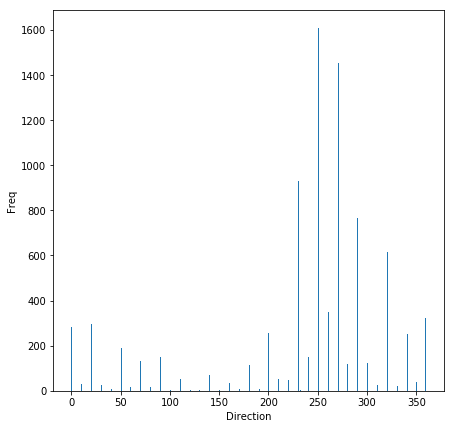

In [107]:
plt.figure(figsize=(7,7))
plt.hist(df['drct'], bins = 360); plt.xlabel("Direction"); plt.ylabel("Freq")
plt.show()

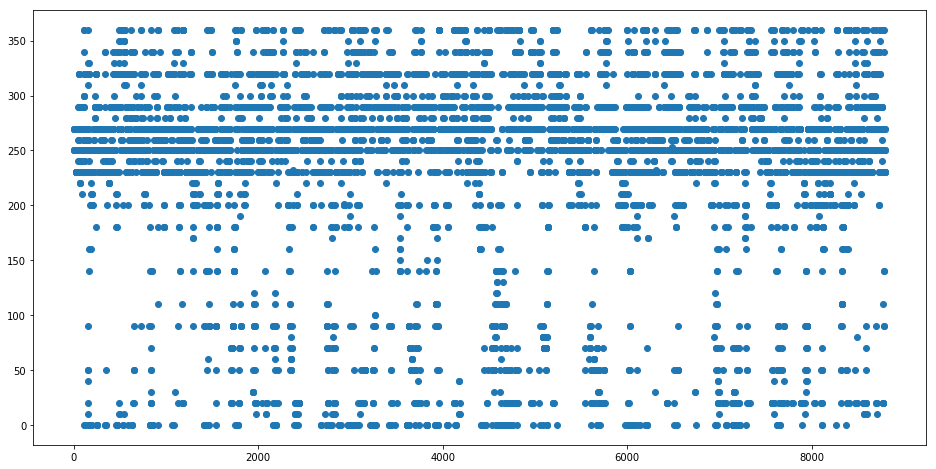

In [13]:
plt.figure(figsize=(16,8))
plt.plot(df['drct'], 'o')

Observations:
- Quite a lot of wind flowing towards North direction ($0^\circ$)
- Very little towards East, South East and South ($90^\circ - 180^\circ$)

#### 3.2.3 Wind Speed Distribution
Wind data generally follows a lognormal distribution or a Weibull distribution. <br>
Let's bin data into a histogram and make a lognormal fit.

Fit Unchecked ...


No handles with labels found to put in legend.


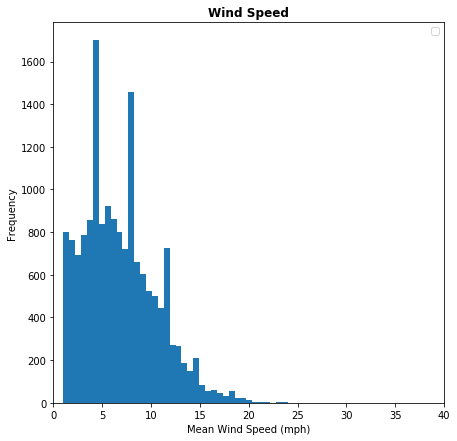

In [387]:
print('Fit Unchecked ...')

#import scipy

wind_data = df['sped'][df['sped'] > 0]

#shape, loc, scale = scipy.stats.lognorm.fit(wind_data, floc=1)

plt.figure(figsize=(7,7))

r""" factor of 0.447 to multiply with wind data"""
plt.hist(0.447*wind_data, bins = 40, density=False)

support = np.linspace(wind_data.min(), wind_data.max(), 100)

#plt.plot(support, 1.5*1e4*scipy.stats.lognorm(shape,loc,0.4*scale).pdf(support), "r--", lw=3, label = 'Lognormal Fit')
plt.title("Wind Speed", weight="bold")
plt.xlabel("Mean Wind Speed (mph)"); plt.ylabel("Frequency")

plt.xlim(0,40)
plt.legend()
plt.show()

Wind Data for Ahmedabad is not very good. 

#### 3.2.4 Windrose Diagram 
Let us visualize the wind data through a Windrose Diagram

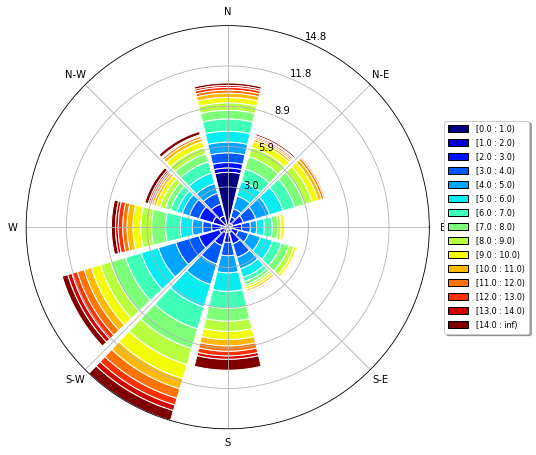

In [317]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax(fig=plt.figure(figsize=(7,7)))
ax.bar(df['drct'], 0.447*df['sped'], nsector = 12, normed=True, bins=np.arange(0, 15, 1), opening=0.90, edgecolor='white')

ax.set_legend(loc="right",borderaxespad = -10, shadow = True)#; plt.show()

# plt.savefig(r'C:\Users\Nitin.N.Singh\Desktop\HACK\Jupyter\Images\Windroses\riogallegos19.png')

#### How to interpret the above diagram?
- Between $22.5^\circ$ and $67.5^\circ$, there are roughly 15.6% of the total observations. So on and so forth. Set normed = False in the code above to get the true number of observations.
- Within a particular direction sector, segment lengths are 'chunked' out depending on the percentage of wind speed observations that fall out in a particular speed bin (similar to stacked histogram). Colored according to the legend. 

## Wake Effect Modeling
<br>

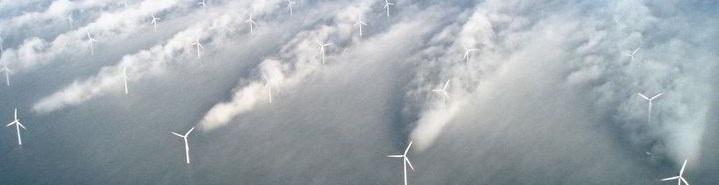

**What is Wake effect**<br>
 The wake effect is the aggregated influence on the energy production of the wind farm, which results from the changes in wind speed, pressure profile and turbulence caused by the impact of the turbines on each other. It is important to consider wake effects from neighbouring wind farms and the possible impact of wind farms which will  be built in the future.
 
 Note - The top part of each turbine (called the nacelle) rotates on the tower beneath so the spinning blades are always facing directly into the wind

## Jensen Wake Model

Jensen model is an analytical engineering wake model derived from the
law of mass-conservation. Its original purpose was to
increase the efficiency of wind clusters through layout optimisation to reduce wake losses. 

Several simplifications are assumed in the model: 
- Flow is assumed to be steady state. That means mass balance equation can be set up. 
- Flow is incompressible. That means density remains constant.
- No frictional losses. 
- instead of considering a Gaussian wind speed distribution within the cross-section of the wake, a constant wind speed is assumed
- Axis symmetric, self-similar velocity profiles is assumed in the far wake.
- the initial diameter of the wake is assumed to be the rotor diameter of the turbine
- the wake expands linearly as a function of downwind distance. Neutrally stable atmospheric boundary layer. No shear.
- the interaction of the wake with the ground is disregarded. This causes an overestimated rate of recovery of velocity
in the wake. 
- Furthermore it is assumed that the centre line of the wake follows the terrain. 
- Classicial theory (*actuator disc momentum theory*) is used for obtaining velocity right after the turbine.
- Near wake zone behind the rotor is ignored in the Jensen's model. 
- It assumes an infinite number of blades, i.e., the velocity is constant over the disk area
and the thrust is uniform over the disk area.
- No turbine characteristic considered. 

Shortcomings:
Due to these simplifications the model is unsuitable for accu-
rately describing the velocity distribution within the wake as well as the properties
of the near wake region. Also Jensen's wake models are not suitable for more than say 100 turbines or so.



### Mass Balance
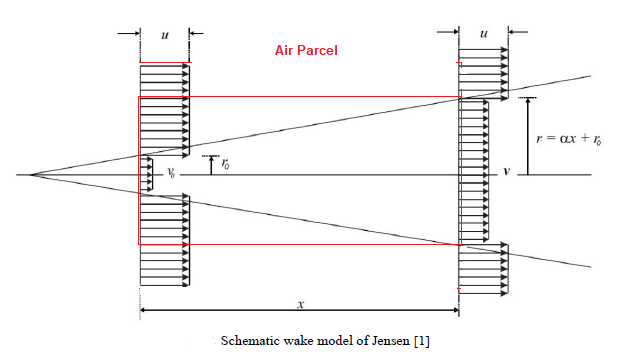

In order to determine in wake velocity deficits, Jensen started from the balance of mass conservation:

$\pi r_{0}^{2} v_{0}+\pi\left(r^{2}-r_{0}^{2}\right) u=\pi r^{2} v$

$r_{0}$ is the rotor radius, $v_{0}$ is the initial wake velocity deficit at the position of the
rotor (right behind turbine), $v$ $v$ is the wind speed at distance $x$ and $u$ is the ambient wind velocity. The initial
wake velocity deficit, $v_{0},$ is derived from the *actuator disc momentum theory*, where
$a$ is the *axial induction factor* (a takes on the value 1/3 ??):

$
v_{0}=u(1-2 a)
$

The linear expansion of the wake, $r,$ is a function of a *wake expansion coefficient*
$\alpha$ and of distance $x$ downstream:

$
r=\alpha x+r_{0}
$

To describe the wind speed velocity deficit at the first in wake turbine, Jensen
used $v_{0}=1 / 3 u$ and derived the following
equation:

$
v=u\left(1-\frac{2}{3}\left(\frac{r_{0}}{r_{0}+\alpha x}\right)^{2}\right)
$

For usual wakes the *entrainment\expansion constant* $\alpha$ is approximately 0.1.

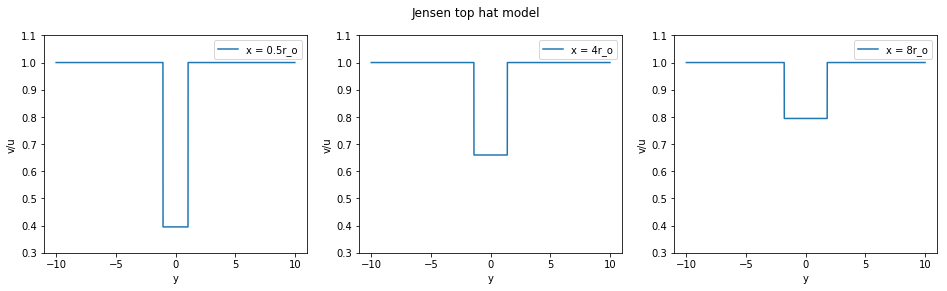

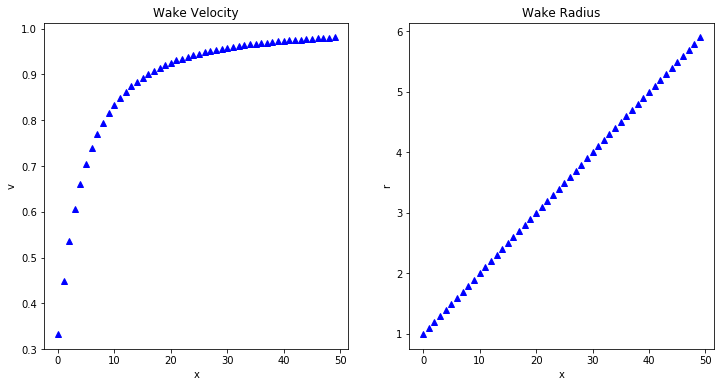

In [727]:
def jensen_top_hat(u_, r_o_, x_, alpha_, delta_theta_, delta_y_):
    r'''Returns Jensen's top-hat calculations
    
    :param
        u_     -  Ambient Wind Velocity  
        r_o_   -  Turbine/Rotor Radius 
        x_     -  Distance x downstream
        alpha_ -  Wake expansion constant
        
    :return
        v_     -  wind speed velocity at x_ 
    '''
    num_calc = delta_y_.shape[0]
    v_ = np.zeros((num_calc,))
    
    #for counter, theta in enumerate(delta_theta_):
    for counter, y in enumerate(delta_y_):    
        # calculate the off axis angle theta
        # if np.abs(theta) > (180/3.14)*np.arctan((r_o_ + alpha_*x_)/x_):
        if np.abs(y) > (r_o_ + alpha_*x_):    
            v_[counter] = u_
        else:
            v_[counter] = u_*(1 - (2/3)*((r_o_/(r_o_ + alpha_*x_))**2))
    return(v_)


u   = 1
r_o = 1
alpha = 0.1

delta_theta = np.arange(-30, 30, 0.05)
delta_y     = np.arange(-10, 10, 0.005)

plt.figure(figsize = (16, 4))
plt.suptitle('Jensen top hat model')

for i,x in enumerate([0.5, 4, 8]):
    v = jensen_top_hat(u, r_o, x, alpha, delta_theta, delta_y)
    
    plt.subplot(1,3,i+1); plt.plot(delta_y,v, label='x = {0}r_o'.format(x))
    plt.legend(); plt.ylim(0.30, 1.1); plt.xlabel('y'); plt.ylabel('v/u')
plt.show()    
  
    
r'''Wake radius and velocity value in the wake'''
plt.figure(figsize = (12, 6))
for i,x in enumerate(range(50)):  
    v = jensen_top_hat(u, r_o, x, alpha, delta_theta, delta_y)
    
    plt.subplot(1,2,1)
    plt.plot(x, v.min(), '^', color = 'b')
    plt.xlabel('x'); plt.ylabel('v'); plt.title('Wake Velocity')
    
    plt.subplot(1,2,2)
    plt.plot(x, (delta_y[v<1][-1] - delta_y[v<1][0])/2, '^', c='b')
    plt.xlabel('x'); plt.ylabel('r'); plt.title('Wake Radius')
plt.show()    

Observations:
- Experfimental velocity profile looks something like this in the wake region.
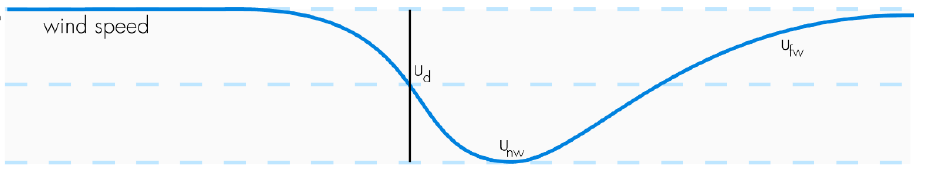
- Near wake zone behind the rotor is ignored in the Jensen's model. 

### Cosine Modification

Motivated from to the differences with experimental results. Distribute the velocity profile in the cross section with a cosine shape instead of the top-hat shape 
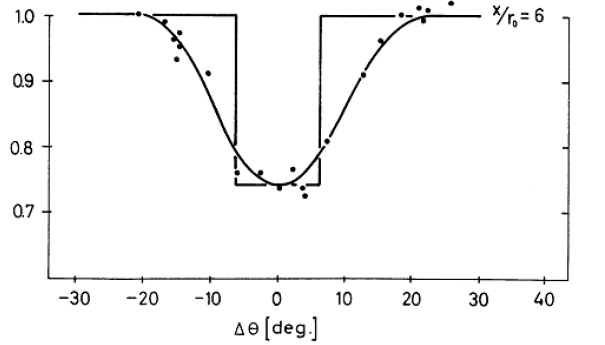
When plotting the modelled wind speed distribution v/u we saw that we obtained a *top-hat* distribution, whereas, as mentioned before, the observed wind speed distribution in the wake is Gaussian (Its a simplification. Strictly its double bell. Its *bellish* around the wake centerline). Jensen then applies a cosine-bell following the below given equation to $x$ and $r_{0}$ to better match the observed Gaussian distribution:

$f(\theta)=\frac{1+\cos (9 \theta)}{2} ; \quad \theta \leq 20^{\circ}$, 
$\theta$ is the off-axis angle.

Comparing the results of this approach with observed wake losses, Jensen found satisfying agreement between modelled and observed losses in single wake cases. In the formula, $\theta$ is in radians.


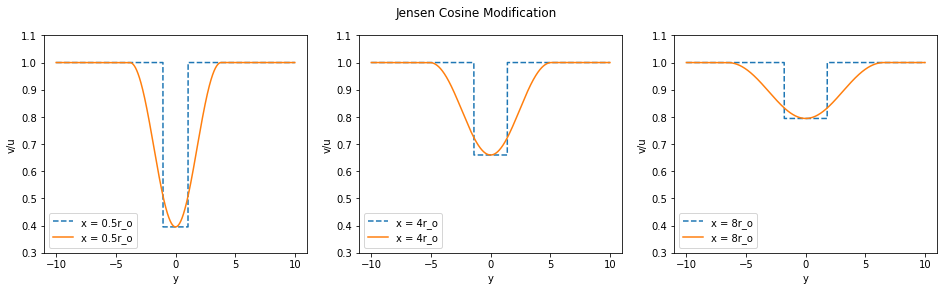

In [892]:
def jensen_cosine(u_, r_o_, x_, alpha_, delta_theta_, delta_y_):
    r'''Returns Jensen's top-hat calculations
    
    :param
        u_     -  Ambient Wind Velocity  
        r_o_   -  Turbine/Rotor Radius 
        x_     -  Distance x downstream
        alpha_ -  Wake expansion constant
        
    :return
        v_     -  wind speed velocity at x_ 
    '''
    num_calc = delta_y_.shape[0]
    v_ = np.zeros((num_calc,))
    
    #for counter, theta in enumerate(delta_theta_):
    for counter, y in enumerate(delta_y_):    
        # calculate the off axis angle theta
        # if np.abs(theta) > (180/3.14)*np.arctan((r_o_ + alpha_*x_)/x_):
        theta_ = np.arctan(y/(x_+(r_o_/alpha_)))
        #print(theta)
        if  (180/np.pi)*np.abs(theta_) > 20:    
            v_[counter] = u_
        else:
            coeff = (1 + np.cos(9*theta_))/2
            v_[counter] = u_*(1 - coeff*(2/3)*((r_o_/(r_o_ + alpha_*x_))**2))
    return(v_)


u   = 1
r_o = 1
alpha = 0.1

delta_theta = np.arange(-30, 30, 0.05)
delta_y     = np.arange(-10, 10, 0.005)

plt.figure(figsize = (16, 4))
plt.suptitle('Jensen Cosine Modification')

for i,x in enumerate([0.5, 4, 8]):
    
    plt.subplot(1,3,i+1) 
    
    v = jensen_top_hat(u, r_o, x, alpha, delta_theta, delta_y)
    plt.plot(delta_y,v, '--',label='x = {0}r_o'.format(x))
    
    v = jensen_cosine(u, r_o, x, alpha, delta_theta, delta_y)
    plt.plot(delta_y,v, label='x = {0}r_o'.format(x))
    
    plt.legend(); plt.ylim(0.30, 1.1); plt.xlabel('y'); plt.ylabel('v/u')
plt.show() 

### Velocity Profiles

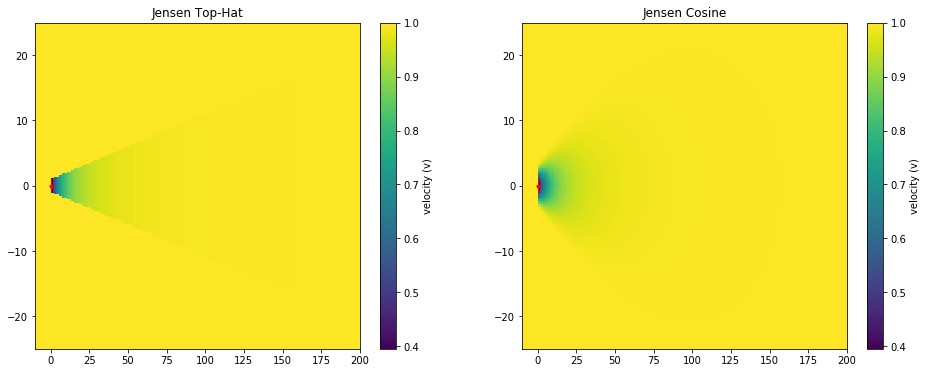

In [979]:
def jensen_velocity_profile(turbine_origin_, minusX_, plusX_, 
                                    minusY_, plusY_, num_steps_, u_, r_o_, alpha_, model_):
    
    slice_x_ = np.linspace(turbine_origin_[0]-minusX_, turbine_origin_[0]+plusX_, num_steps_)
    slice_y_ = np.linspace(turbine_origin_[1]+plusY_, turbine_origin_[1]-minusY_, num_steps_)
    
    vel_meshXY_ = np.zeros((num_steps_,num_steps_))
    
    if model_ == 'top_hat':
        for i,y_ in enumerate(slice_y_.flatten()):
            for j,x_ in enumerate(slice_x_.flatten()):
                if x_-turbine_origin_[0]<0 or np.abs(y_-turbine_origin_[1]) > (r_o_ + alpha_*(x_-turbine_origin_[0])): 
                        vel_meshXY_[i,j] = u_
                else:    
                        vel_meshXY_[i,j] = u_*(1 - (2/3)*((r_o_/(r_o_ + alpha_*(x_-turbine_origin_[0])))**2)) 
    else:
        for i,y_ in enumerate(slice_y_.flatten()):
            for j,x_ in enumerate(slice_x_.flatten()):
                theta_ = np.arctan((y_-turbine_origin_[1])/((x_-turbine_origin_[0])+(r_o_/np.tan(alpha_))))
                if x_-turbine_origin_[0]<0 or (180/np.pi)*np.abs(theta_) > 20: 
                    vel_meshXY_[i,j] = u_
                else:
                    coeff = (1 + np.cos(9*theta_))/2
                    vel_meshXY_[i,j] = u_*(1 - coeff*(2/3)*((r_o_/(r_o_ + alpha_*(x_-turbine_origin_[0])))**2))
    return(vel_meshXY_)             


 
r'''Wind, Turbine Parameters and turbine location'''
u   = 1
r_o = 1
alpha = 0.1
turbine_origin = [0,0]; minusX = 10; plusX = 200; minusY = 25; plusY = 25; num_steps = 201

plt.figure(figsize=(16,6))
for fig_num, model in enumerate(['top_hat', 'cosine']):
    vel_meshXY = jensen_velocity_profile(turbine_origin, minusX, plusX, 
                                                 minusY, plusY, num_steps, u, r_o, alpha, model)
    
    plt_title = 'Jensen Top-Hat' if model=='top_hat' else 'Jensen Cosine'
    
    plt.subplot(1,2,fig_num+1); plt.title(plt_title)
    plt.imshow(vel_meshXY, extent=[-10, 200, -25, 25], aspect='auto', cmap = 'viridis')
    plt.colorbar(label = 'velocity (v)')

    r'''plot turbine location'''
    plt.plot(0, 0, '*', markersize= 4, color = 'r')
    plt.plot([0, 0], [1, -1], color='r', linestyle='-', linewidth=1)

    #plt.xlim(-1,1); plt.ylim(-4,4)

to do:
    add slider in the image above

### 10 Turbines on a Circular Array

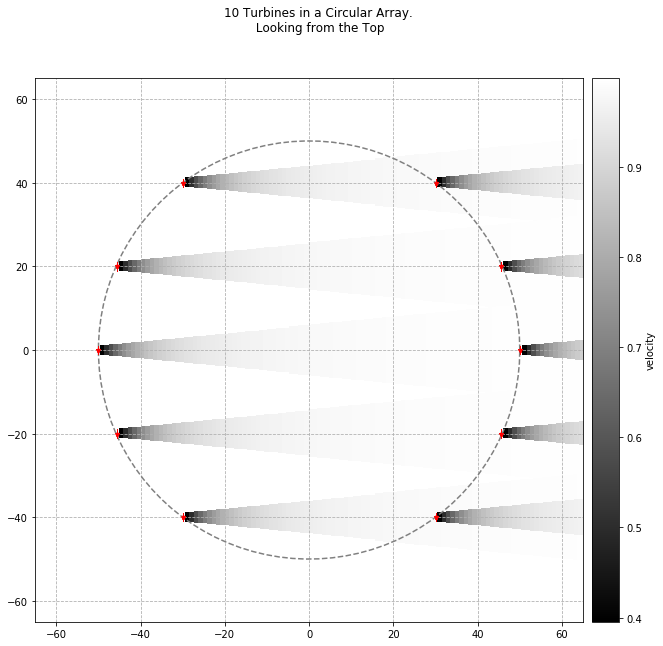

In [991]:
turbine_positions = np.array([[-30. ,  40. ],
                              [-45.5,  20. ],
                              [-50. ,   0. ],
                              [-45.5, -20. ],
                              [-30. , -40. ],
                              [ 30. ,  40. ],
                              [ 45.5,  20. ],
                              [ 50. ,   0. ],
                              [ 45.5, -20. ],
                              [ 30. , -40. ],])

r'''Mark turbine locations and plot a circle around'''
plt.figure(figsize=(10.5,10)); ax = plt.gca()
plt.suptitle('10 Turbines in a Circular Array.\n Looking from the Top')
for turbine_loc in turbine_positions:
    plt.plot(turbine_loc[0], turbine_loc[1], '*', markersize = 5, color='r')

plt.xlim(-65,65)
plt.ylim(-65,65)
plt.grid(linestyle='--')

ang = np.linspace(0, 2*np.pi, 100)
r = 50
x1 = r*np.cos(ang)
x2 = r*np.sin(ang)
ax.plot(x1, x2, '--', color = 'gray')


r'''set turbine params'''
u   = 1
r_o = 1
alpha = 0.1
minusX = 10; plusX = 200; minusY = 25; plusY = 25; num_steps = 201


r'''loop over turbines calling jensen_velocity_profile()'''
for turbine_loc in turbine_positions:
    
    r'''plot turbine location'''
    plt.plot(turbine_loc[0], turbine_loc[1], '*', markersize= 4, color = 'r')
    plt.plot([turbine_loc[0], turbine_loc[0]], [turbine_loc[1]+r_o, turbine_loc[1]-r_o],
             color='r', linestyle='-', linewidth=1)
    
    vel_meshXY = jensen_velocity_profile(turbine_loc, minusX, plusX, 
                                                 minusY, plusY, num_steps, u, r_o, alpha, 'top_hat')
    # mask outside wake by nan
    vel_meshXY[vel_meshXY == 1.0] = np.nan
    plt.imshow(vel_meshXY, extent=[turbine_loc[0]-minusX, turbine_loc[0]+plusX, 
                                   turbine_loc[1]-minusY, turbine_loc[1]+plusY], 
                                   aspect='auto', cmap = 'gray')
    
    
    
plt.colorbar(fraction=0.05, pad=0.015, label = 'velocity')

## Jensen-Katic Model (Jensen-Park or PARK Model)
Minor modification over original Jensen's model.

Motivation. Because the thrust coefficient of a turbine normally is dependent on the wind speed, the initial velocity deficit should also be. 
The Park model, is the wake model implemented in the most commercial software packages, like WAsP, in WindSim, in WindFarmer, in OpenWind.

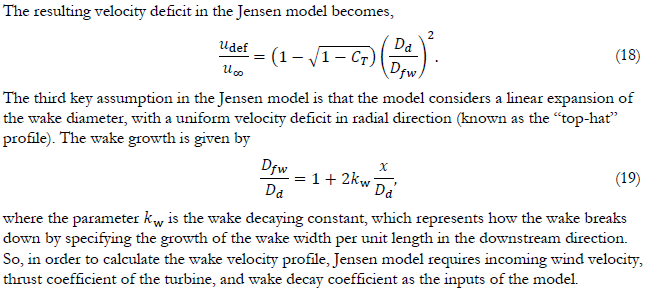
, where $C_T$ is thrust coefficient corresponding to wind speed and  



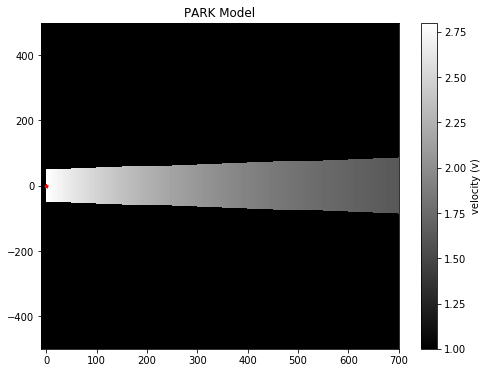

In [152]:
def park_velocity_profile(turbine_origin_, minusX_, plusX_, 
                                    minusY_, plusY_, num_steps_, u_, r_o_, kw_, Ct_):
    
    slice_x_ = np.linspace(turbine_origin_[0]-minusX_, turbine_origin_[0]+plusX_, num_steps_)
    slice_y_ = np.linspace(turbine_origin_[1]+plusY_, turbine_origin_[1]-minusY_, num_steps_)
    
    vel_meshXY_ = np.zeros((num_steps_,num_steps_))
    
    for i,y_ in enumerate(slice_y_.flatten()):
        for j,x_ in enumerate(slice_x_.flatten()):
            if x_-turbine_origin_[0]<0 or np.abs(y_-turbine_origin_[1]) > (r_o_ + kw_*(x_-turbine_origin_[0])): 
                    vel_meshXY_[i,j] = u_
            else:    
                    vel_meshXY_[i,j] = u_*(1 - (1-np.sqrt(1-Ct_))*((r_o_/(r_o_ + kw_*(x_-turbine_origin_[0])))**2)) 
    
    return(vel_meshXY_)             

 
r'''Wind, Turbine Parameters and turbine location'''
u   = 8
r_o = 50
Ct  = 0.4
kw  = 0.05 #0.075
turbine_origin = [0,0]; minusX = 10; plusX = 700; minusY = 500; plusY = 500; num_steps = 401

plt.figure(figsize=(8,6))

vel_meshXY = park_velocity_profile(turbine_origin, minusX, plusX, 
                                             minusY, plusY, num_steps, u, r_o, kw, Ct)

plt.imshow((9-vel_meshXY), extent=[-10, 700, -500, 500], aspect='auto', cmap = 'gray')
plt.colorbar(label = 'velocity (v)')

plt.title('PARK Model')

r'''plot turbine location'''
plt.plot(0, 0, '*', markersize= 4, color = 'r')
plt.plot([0, 0], [1, -1], color='r', linestyle='-', linewidth=1)

    

In [268]:
x = 2000; ct= 0
5*(1-((50*(1-np.sqrt(1-ct)))/(50+0.05*x)))

5.0

## Annual Energy Output of a Windfarm

Todo: 
- Get convinced about binning again
- make bin sizes independent
- Visualization
- pdf problem statement
- AEP Pseudocode
- benchmarking table
- clean jupyter
- code profiling
- think yaml support

In [160]:
# -*- coding: utf-8 -*-
"""
Created on: xxxx
@author   : Anon

NAME
    Farm_Evalautor.py
    
PYTHON VERSION   
    3.7.3 
    
DESCRIPTION
    Calculates Annual Energy Production (AEP) of a Wind Farm
    ============================================================    
    
    Farm_Evalautor.py is a python file that calculates AEP (GWh)
    of a certain arrangement of wind turbines in a wind farm, under 
    given annual wind conditions. 
    
    The code in this script for wake-effect modeling is based on
    standard Jensen (PARK) model. 
    I. Katic, J. Hojstrup and N. Jensen, "A simple model for cluster 
    efficiency," in European Wind Energy Association Conference and 
    Exhibition, 1986.
    
    As its inputs, the code takes three data files containing info 
    about:
    - Turbine Locations
    - Turbine Power Curve
    - Annual Wind Conditions
    
PACKAGE LIST
    You may need to install the packages Tqdm and Shapely in your
    python distribution. These are not pre-installed. 
    ============================================================
    Packages Used:
    Numpy
    Pandas
    Numba
    Tqdm
    Shapely
    math (built-in)
"""

# Module List
import numpy  as np
import pandas as pd    
from   numba  import njit                      # For some speed gains                    
from   math   import radians as DegToRad       # For converting degrees to radians

from shapely.geometry import Point             # Imported for constraint checking
from shapely.geometry.polygon import Polygon

from tqdm import tqdm_notebook as tqdm         # For Progressbar
# Use from tqdm import tqdm_notebook as tqdm for running in Jupyter Notebook  
# Use from tqdm import tqdm for running in IDE Environ 



def getTurbLoc(turb_loc_file_name):
    """ 
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Returns x,y turbine coordinates
    
    :Called from
        main function
    
    :param
        turb_loc_file_name - Turbine Loc csv file location
        
    :return
        2D array
    """
    
    df = pd.read_csv(turb_loc_file_name, sep=',')
    turb_coords = df.to_numpy(dtype = np.float32)
    return(turb_coords)


def loadPowerCurve(power_curve_file_name):
    """
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Returns a 2D numpy array with information about
    turbine thrust coeffecient and power curve of the 
    turbine for given wind speed
    
    :called_from
        main function
    
    :param
        power_curve_file_name - power curve csv file location
        
    :return
        Returns a 2D numpy array with cols Wind Speed (m/s), 
        Thrust Coeffecient (non dimensional), Power (MW)
    """
    powerCurve = pd.read_csv(power_curve_file_name, sep=',')
    powerCurve = powerCurve.to_numpy(dtype = np.float32)
    return(powerCurve)
    

def binWindResourceData(wind_data_file_name):
    r"""
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Loads the wind data. Returns a 2D array with shape (36,15). 
    Each cell in  array is a wind direction and speed 'instance'. 
    Values in a cell correspond to probability of instance
    occurence.  
    
    :Called from
        main function
        
    :param
        wind_data_file_name - Wind Resource csv file  
        
    :return
        2D array with estimated probabilities of wind instance occurence. 
        Along: Row-direction (drct), Column-Speed (s)
        
                      |0<=s<2|2<=s<4| ...  |26<=s<28|28<=s<30|
        |_____________|______|______|______|________|________|
        | drct = 360  |  --  |  --  |  --  |   --   |   --   |
        | drct = 10   |  --  |  --  |  --  |   --   |   --   |
        | drct = 20   |  --  |  --  |  --  |   --   |   --   |
        |   ....      |  --  |  --  |  --  |   --   |   --   |
        | drct = 340  |  --  |  --  |  --  |   --   |   --   |
        | drct = 350  |  --  |  --  |  --  |   --   |   --   |        
    """
    
    # Load wind data. Then, extracts the 'drct', 'sped' columns
    df = pd.read_csv(wind_data_file_name)
    wind_resource = df[['drct', 'sped']].to_numpy(dtype = np.float32)
    
    # direction 'slices' in degrees
    slices_drct   = np.roll(np.arange(10, 361, 10, dtype=np.float32), 1)
    n_slices_drct = slices_drct.shape[0]
    
    # speed 'slices'
    slices_sped   = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 
                        18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0]
    n_slices_sped = len(slices_sped)-1

    
    # placeholder for binned wind
    binned_wind = np.zeros((n_slices_drct, n_slices_sped), 
                           dtype = np.float32)
    
    # 'trap' data points inside the bins. 
    for i in range(n_slices_drct):
        for j in range(n_slices_sped):     
            
            # because we already have drct in the multiples of 10
            foo = wind_resource[(wind_resource[:,0] == slices_drct[i])] 

            foo = foo[(foo[:,1] >= slices_sped[j]) 
                          & (foo[:,1] <  slices_sped[j+1])]
            
            binned_wind[i,j] = foo.shape[0] 
    
    wind_inst_freq   = binned_wind/np.sum(binned_wind)
    
    return(wind_inst_freq)


def windFrame(turb_coords, wind_drct):
    """
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Converts euclidean coordinates to downwind/crosswind coordinates.
    Rotate the axes such that the wind flow direction aligns with the
    positive x-axis. 
    
    :called from
        partAEP
        
    :param
        turb_coords   - 2D array. turbine euclidean x,y coordinates
        wind_drct     - wind direction in degrees. 
                        [{'N':0},{'E':90},{'S':180},{'W':270}]
        
    :return    
        Rotated turbine locations. 
    """
    
    wind_drct = wind_drct-90
    
    # Convert inflow wind direction from degrees to radians
    wind_drct = DegToRad(wind_drct)

    # Constants to use below
    cos_dir = np.cos(wind_drct)
    sin_dir = np.sin(wind_drct)
    
    # Convert to downwind(x) & crosswind(y) coordinates
    frame_coords      =    np.zeros((turb_coords.shape[0],2), dtype=np.float32)
    frame_coords[:,0] =    (turb_coords[:,0] * cos_dir) - (turb_coords[:,1] * sin_dir)
    frame_coords[:,1] =    (turb_coords[:,0] * sin_dir) + (turb_coords[:,1] * cos_dir)
    
    return(frame_coords)


@njit            # jensenParkWake is numba compiled function. Gives speed gains. 
def jensenParkWake(n_turbs, turb_diam, frame_coords, power_curve, wind_sped):
    """
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Return each turbine's total velocity deficit due to the wake from 
    the upstream turbines for given particular wind instance i.e. wind_sped
    and drct (indirectly represented by rotated frame_coords). 
    Uses Jensen's (PARK) model. 
    
    :called from
        partAEP
        
    :param
        n_turbs      - Total number of turbines
        turb_diam    - Diameter of the turbine (m)
        frame_coords - Rotated turbine coordinates
        power_curve  - For estimating thrust coeff (C_t) 
        wind_sped    - Wind Speed (m/s)
        
    :return
        Velocity deficit for each turbine. returns array
    """
    # turbine radius
    turb_rad = turb_diam/2

    # we use power_curve data as look up to estimate the thrust coeff.
    # of the turbine for the corresponding closest matching wind speed
    idx_foo  = np.argmin(np.abs(power_curve[:,0] - wind_sped))
    C_t      = power_curve[idx_foo,1]
    
    # Wake decay constant kw for the offshore case
    kw = 0.05 
    
    # velocity deficit suffered by each turbine for this particular wind instance
    # impact_on_ibyj - placeholder to calc vel deficit from all turbs on i                 
    impact_on_ibyj = np.zeros((n_turbs,n_turbs), dtype=np.float32) 
        
    # i - target turbine
    for i in range(n_turbs):   
        
        # looping over all other turbs to check their effect
        for j in range(n_turbs):             
            
            # Calculate the x-dist and the y-offset 
            # (wrt downwind/crosswind coordinates)
            x = frame_coords[i,0] - frame_coords[j,0]   
            y = frame_coords[i,1] - frame_coords[j,1]   
            
            # Naturally, no wake effect of turbine on itself
            if i!=j: 
                
                # either j not an upstream turbine or wake not happening 
                # on i because its outside of the wake region of j                    
                if x<=0 or np.abs(y) > (turb_rad + kw*x):  
                    impact_on_ibyj[i,j] = 0.0
                
                # otherwise, at target i, wake is happening due to j
                else:                               
                    impact_on_ibyj[i,j] = (1-np.sqrt(1-C_t))*((turb_rad/(turb_rad + kw*x))**2)
            
    # Calculate Total vel deficit from all upstream turbs, using sqrt of sum of sqrs
    sped_deficit = np.sqrt(np.sum(impact_on_ibyj**2, axis = 1))

    return(sped_deficit)


def partAEP(n_turbs, turb_diam, turb_coords, power_curve, wind_drct, wind_sped):
    """
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Returns total power produced by all the turbine for this particular 
    'wind instance' represented by wind_drct, wind_sped.
    
    :called from
        totalAEP
        
    :param
        n_turbs      - Total number of turbines
        turb_diam    - Diameter of the turbine (m)
        turb_coords  - 2D array turbine x,y coordinates
        power_curve  - For estimating thrust coeff, C_t
        wind_drct    - wind direction in degrees
        wind_sped    - Wind Speed (m/s)
        
    :return
        total power produced for single wind instance  
    """
    # For given wind_drct shift coord frame of ref to downwind/crosswind 
    frame_coords = windFrame(turb_coords, wind_drct)
    
    # Use the jensen park wake model to calc speed deficits by wake
    sped_deficit = jensenParkWake(n_turbs, turb_diam, frame_coords, power_curve, wind_sped)
    
    # Placeholder for storing power output of turbines
    turb_pwr = np.zeros(n_turbs, dtype=np.float32)

    # calculate the individual turbine power for effective wind speed
    for i in range(n_turbs):
        
        # Effective windspeed due to the happening wake
        wind_sped_eff = wind_sped*(1.0 - sped_deficit[i])
        
        # we use power_curve data as look up to estimate the power produced
        # by the turbine for the corresponding closest matching wind speed
        idx_foo = np.argmin(np.abs(power_curve[:,0] - wind_sped_eff))
        pwr     = power_curve[idx_foo,2]
        
        turb_pwr[i] = pwr
           
    # Sum the power from all turbines for this wind instance
    power = np.sum(turb_pwr)
    
    return power


def totalAEP(turb_diam, turb_coords, power_curve, wind_inst_freq):
    """
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Calculates the wind farm AEP
    
    :called from
        main 
        
    :param
        turb_diam       - Diameter of the turbine (m)
        turb_coords     - 2D array turbine euclidean coordinates
        power_curve     - For estimating thrust coeff (C_t)
        wind_inst_freq  - 2D array with estimated probabilities of 
                          wind instance occurence.(return from func 
                          binWindResourceData)
                          
    :return
        wind farm AEP in Gigawatt Hours, GWh (float)
    """
    # number of turbines
    n_turbs        =   turb_coords.shape[0]
    # assert n_turbs ==  50, "Error! Number of turbines is not 50."
    
    # direction 'slices' in degrees
    slices_drct   = np.roll(np.arange(10, 361, 10, dtype=np.float32), 1)
    n_slices_drct = slices_drct.shape[0]
    
    # speed 'slices'
    slices_sped   = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 
                        18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0]
    n_slices_sped = len(slices_sped)-1

    # Power produced by the wind farm from each wind (bin) instance
    farm_pwr = np.zeros((wind_inst_freq.shape), dtype=np.float32)
    
    # Looping over every wind direction, wind speed instance
    # set disable=True for disabling progressbar
    for i in tqdm(range(n_slices_drct), disable=False):
        for j in range(n_slices_sped): 
            
            # take the mid value as effective direction and speed
            wind_drct =  slices_drct[i]
            wind_sped = (slices_sped[j] + slices_sped[j+1])/2
            
            pwr  = partAEP(n_turbs, turb_diam, turb_coords, 
                           power_curve, wind_drct, wind_sped)
            
            farm_pwr[i,j] = pwr
    
    # multiply the respective values with the wind instance probabilities 
    farm_pwr = wind_inst_freq * farm_pwr
    
    # now sum all values
    farm_pwr = np.sum(farm_pwr)
    
    # multiply farm_pwr by hours in a year
    hrs_per_year = 365.*24.
    AEP = hrs_per_year*farm_pwr
    
    # Convert MWh to GWh
    AEP = AEP/1e3
    return(AEP)


def checkConstraints(turb_coords, turb_diam):
    """
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Checks if the turbine configuration satisfies the two
    constraints:(i) perimeter constraint,(ii) proximity constraint 
    Prints which constraints are violated if any. Note that this 
    function does not quantifies the amount by which the constraints 
    are violated if any. 
    
    :called from
        main 
        
    :param
        turb_coords - 2d np array containing turbine x,y coordinates
        turb_diam   - Diameter of the turbine (m)
    
    :return
        None. Prints messages.   
    """
    bound_clrnc      = 50
    prox_constr_viol = False
    peri_constr_viol = False
    
    # create a shapely polygon object of the wind farm
    farm_peri = [(0, 0), (0, 4000), (4000, 4000), (4000, 0)]
    farm_poly = Polygon(farm_peri)
    
    # checks if for every turbine perimeter constraint is satisfied. 
    # breaks out if False anywhere
    for turb in turb_coords:
        turb = Point(turb)
        inside_farm   = farm_poly.contains(turb)
        correct_clrnc = farm_poly.boundary.distance(turb) > bound_clrnc
        if (inside_farm == False or correct_clrnc == False):
            peri_constr_viol = True
            break
    
    # checks if for every turbines proximity constraint is satisfied. 
    # breaks out if False anywhere
    for i,turb1 in enumerate(turb_coords):
        for turb2 in np.delete(turb_coords, i, axis=0):
            if  np.linalg.norm(turb1 - turb2) < 3*turb_diam:
                prox_constr_viol = True
                break
    
    # print messages
    if  peri_constr_viol  == True  and prox_constr_viol == True:
          print('Somewhere both perimeter constraint and proximity constraint are violated\n')
    elif peri_constr_viol == True  and prox_constr_viol == False:
          print('Somewhere perimeter constraint is violated\n')
    elif peri_constr_viol == False and prox_constr_viol == True:
          print('Somewhere proximity constraint is violated\n')
    else: print('Both perimeter and proximity constraints are satisfied !!\n')
        
    return()
    

if __name__ == "__main__":
    
    # Turbine Specifications.
    # -**-SHOULD NOT BE MODIFIED-**-
    turb_specs    =  {   
                         'Name': 'Anon Name',
                         'Vendor': 'Anon Vendor',
                         'Type': 'Anon Type',
                         'Dia (m)': 100,
                         'Rotor Area (m2)': 7853,
                         'Hub Height (m)': 100,
                         'Cut-in Wind Speed (m/s)': 3.5,
                         'Cut-out Wind Speed (m/s)': 25,
                         'Rated Wind Speed (m/s)': 15,
                         'Rated Power (MW)': 3
                     }
    turb_diam      =  turb_specs['Dia (m)']
    
    
    # Turbine x,y coordinates
    turb_coords    =  getTurbLoc(r'C:\Users\Nitin.N.Singh\Desktop\HACK\Optimization\Data\turbine_loc_init.csv')
    
    # Load the power curve
    power_curve    =  loadPowerCurve('powerCurve.csv')
    
    # Pass wind data csv file location to function binWindResourceData.
    # Retrieve probabilities of wind instance occurence.
    wind_inst_freq =  binWindResourceData(r'C:\Users\Nitin.N.Singh\Desktop\HACK\Final Datasets\Benbecula\Filtered\2019.csv')
    
    # check if there is any constraint is violated before we do anything. Comment 
    # out the function call to checkConstraints below if you desire. Note that 
    # this is just a check and the function does not quantifies the amount by 
    # which the constraints are violated if any. 
    checkConstraints(turb_coords, turb_diam)
     
    print('Calculating AEP......')
    AEP = totalAEP(turb_diam, turb_coords, power_curve, wind_inst_freq) 
    print('Total power produced by the wind farm is: ', "%.4f"%(AEP), 'GWh')


Somewhere proximity constraint is violated

Calculating AEP......



Total power produced by the wind farm is:  508.2926 GWh


In [165]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

point = Point(0.05,0.05)
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
polygon.exterior.distance(point)

0.05

In [164]:
poly = Polygon([(0, 0), (2,8), (14, 10), (6,1)])
point = Point(4,4)
poly.exterior.distance(point)

2.910427500435996

In [444]:
from shapely import geometry

polygon = [(3, 2), (5, 1), (7, 2), (8, 6), (9, 7), (11, 6), (10, 4), (12, 2), (15, 2), (16, 5), (19, 7), (18, 11), (14, 12), (11, 9), (5, 9), (2, 6)] 
Point_X = 14
Point_Y = 120

line = geometry.LineString(polygon)
point = geometry.Point(Point_X, Point_Y)

print(line.contains(point))

False


## Vectorised. Annual Energy Output of a Windfarm

In [155]:
# -*- coding: utf-8 -*-
"""
Created on: xxxx
@author   : Anon

NAME
    Farm_Evalautor.py
    
PYTHON VERSION   
    3.7.3 
    
DESCRIPTION
    Calculates Annual Energy Production (AEP) of a Wind Farm
    ============================================================    
    
    This is vectorzied version of Farm_Evalautor.py. 
    Farm_Evalautor_Vec.py is a python file that calculates AEP (GWh)
    of a certain arrangement of wind turbines in a farm, under 
    given annual wind conditions. 
    
    The code in this script for wake-effect modeling is based on
    standard Jensen (PARK) model. 
    I. Katic, J. Hojstrup and N. Jensen, "A simple model for cluster 
    efficiency," in European Wind Energy Association Conference and 
    Exhibition, 1986.
    
    As its inputs, the code takes three data files containing info 
    about:
    - Turbine Locations
    - Turbine Power Curve
    - Annual Wind Conditions
    
PACKAGE LIST
    You may need to install the package Shapely in your
    python distribution. These are not pre-installed. 
    =============================================================
    Packages Used:
    Numpy
    Pandas
    Shapely
    math (built-in)
    
OPTIMIZATION USAGE
    This vectorized version is faster than unvectorized version
    Farm_Evalautor.py. Due to speed benefits, we advise you to use 
    the function calcAEP in this script while developing the optimizer. 
    =============================================================
    
    One way to use calcAEP function as AEP evaluator while optimizing is:
    - STEP 1. Import the relevant function from Farm_Evalautor_Vec. 
              from Farm_Evalautor_Vec import getTurbLoc, loadPowerCurve, 
              binWindResourceData, preProcessing, calcAEP
    - STEP 2. Set Turbine Radius to 50.0. First arg of calcAEP
    - STEP 3. Load Turbine Locations. Using function getTurbLoc
    - STEP 4. Load Power Curve. Using function loadPowerCurve
    - STEP 5. Load wind instance probabilities. 
              Using function binWindResourceData
    - STEP 6. Perform Preprocessing by calling function preProcessing.
              We do preprocessing to avoid same repeating calculations.
              Do them once. 
    - STEP 7. Finally, call function calcAEP
    
    This makes it easy to control the reloading of data and hence achieve
    better performance.      
"""

# Module List
import numpy  as np
import pandas as pd                     
from   math   import radians as DegToRad       # For converting degrees to radians

from shapely.geometry import Point             # Imported for constraint checking
from shapely.geometry.polygon import Polygon


def getTurbLoc(turb_loc_file_name):
    """ 
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Returns x,y turbine coordinates
    
    :Called from
        main function
    
    :param
        turb_loc_file_name - Turbine Loc csv file location
        
    :return
        2D array
    """
    
    df = pd.read_csv(turb_loc_file_name, sep=',', dtype = np.float32)
    turb_coords = df.to_numpy(dtype = np.float32)
    return(turb_coords)


def loadPowerCurve(power_curve_file_name):
    """
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Returns a 2D numpy array with information about
    turbine thrust coeffecient and power curve of the 
    turbine for given wind speed
    
    :called_from
        main function
    
    :param
        power_curve_file_name - power curve csv file location
        
    :return
        Returns a 2D numpy array with cols Wind Speed (m/s), 
        Thrust Coeffecient (non dimensional), Power (MW)
    """
    powerCurve = pd.read_csv(power_curve_file_name, sep=',', dtype = np.float32)
    powerCurve = powerCurve.to_numpy(dtype = np.float32)
    return(powerCurve)
    

def binWindResourceData(wind_data_file_name):
    r"""
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Loads the wind data. Returns a 2D array with shape (36,15). 
    Each cell in  array is a wind direction and speed 'instance'. 
    Values in a cell correspond to probability of instance
    occurence.  
    
    :Called from
        main function
        
    :param
        wind_data_file_name - Wind Resource csv file  
        
    :return
        1-D flattened array of the 2-D array shown below. Values 
        inside cells, rough probabilities of wind instance occurence. 
        Along: Row-direction (drct), Column-Speed (s). Array flattened
        for vectorization purpose. 
        
                      |0<=s<2|2<=s<4| ...  |26<=s<28|28<=s<30|
        |_____________|______|______|______|________|________|
        | drct = 360  |  --  |  --  |  --  |   --   |   --   |
        | drct = 10   |  --  |  --  |  --  |   --   |   --   |
        | drct = 20   |  --  |  --  |  --  |   --   |   --   |
        |   ....      |  --  |  --  |  --  |   --   |   --   |
        | drct = 340  |  --  |  --  |  --  |   --   |   --   |
        | drct = 350  |  --  |  --  |  --  |   --   |   --   |        
    """
    
    # Load wind data. Then, extracts the 'drct', 'sped' columns
    df = pd.read_csv(wind_data_file_name)
    wind_resource = df[['drct', 'sped']].to_numpy(dtype = np.float32)
    
    # direction 'slices' in degrees
    slices_drct   = np.roll(np.arange(10, 361, 10, dtype=np.float32), 1)
    n_slices_drct = slices_drct.shape[0]
    
    # speed 'slices'
    slices_sped   = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 
                        18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0]
    n_slices_sped = len(slices_sped)-1

    
    # placeholder for binned wind
    binned_wind = np.zeros((n_slices_drct, n_slices_sped), 
                           dtype = np.float32)
    
    # 'trap' data points inside the bins. 
    for i in range(n_slices_drct):
        for j in range(n_slices_sped):     
            
            # because we already have drct in the multiples of 10
            foo = wind_resource[(wind_resource[:,0] == slices_drct[i])] 

            foo = foo[(foo[:,1] >= slices_sped[j]) 
                          & (foo[:,1] <  slices_sped[j+1])]
            
            binned_wind[i,j] = foo.shape[0]  
    
    wind_inst_freq   = binned_wind/np.sum(binned_wind)
    wind_inst_freq   = wind_inst_freq.ravel()
    
    return(wind_inst_freq)


def searchSorted(lookup, sample_array):
    """
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Returns lookup indices for closest values w.r.t sample_array elements
    
    :called_from
        preProcessing, calcAEP
    
    :param
        lookup       - The lookup array
        sample_array - Array, whose elements need to be matched
                       against lookup elements. 
        
    :return
        lookup indices for closest values w.r.t sample_array elements 
    """
    lookup_middles = lookup[1:] - np.diff(lookup.astype('f'))/2
    idx1 = np.searchsorted(lookup_middles, sample_array)
    indices = np.arange(lookup.shape[0])[idx1]
    return indices

   

def preProcessing(power_curve):
    """
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Doing preprocessing to avoid the same repeating calculations.
    Record the required data for calculations. Do that once.
    Data are set up (shaped) to assist vectorization. Used later in
    function totalAEP. 
    
    :called_from
        main function
    
    :param
        power_curve - 2D numpy array with cols Wind Speed (m/s), 
                      Thrust Coeffecient (non dimensional), Power (MW)
        
    :return
        n_wind_instances  - number of wind instances (int)
        cos_dir           - For coordinate transformation 
                            2D Array. Shape (n_wind_instances,1)
        sin_dir           - For coordinate transformation 
                            2D Array. Shape (n_wind_instances,1)
        wind_sped_stacked - column staked all speed instances n_turb times. 
        C_t               - 3D array with shape (n_wind_instances, n_turbs, n_turbs)
                            Value changing only along axis=0. C_t, thrust coeff.
                            values for all speed instances. 
    """
    # number of turbines
    n_turbs       =   50
    
    # direction 'slices' in degrees
    slices_drct   = np.roll(np.arange(10, 361, 10, dtype=np.float32), 1)
    n_slices_drct = slices_drct.shape[0]
    
    # speed 'slices'
    slices_sped   = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 
                        18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0]
    n_slices_sped = len(slices_sped)-1
    
    # number of wind instances
    n_wind_instances = (n_slices_drct)*(n_slices_sped)
    
    # Create wind instances. There are two columns in the wind instance array
    # First Column - Wind Speed. Second Column - Wind Direction
    # Shape of wind_instances (n_wind_instances,2). 
    # Values [1.,360.],[3.,360.],[5.,360.]...[25.,350.],[27.,350.],29.,350.]
    wind_instances = np.zeros((n_wind_instances,2), dtype=np.float32)
    counter = 0
    for i in range(n_slices_drct):
        for j in range(n_slices_sped): 
            
            wind_drct =  slices_drct[i]
            wind_sped = (slices_sped[j] + slices_sped[j+1])/2
            
            wind_instances[counter,0] = wind_sped
            wind_instances[counter,1] = wind_drct
            counter += 1

    # Convert inflow wind direction from degrees to radians
    wind_drcts =  np.radians(wind_instances[:,1] - 90)
    # For coordinate transformation 
    cos_dir = np.cos(wind_drcts).reshape(n_wind_instances,1)
    sin_dir = np.sin(wind_drcts).reshape(n_wind_instances,1)
    
    # create copies of n_wind_instances wind speeds from wind_instances
    wind_sped_stacked = np.column_stack([wind_instances[:,0]]*n_turbs)
   
    # Pre-prepare matrix with stored thrust coeffecient C_t values for 
    # n_wind_instances shape (n_wind_instances, n_turbs, n_turbs). 
    # Value changing only along axis=0. C_t, thrust coeff. values for all 
    # speed instances.
    # we use power_curve data as look up to estimate the thrust coeff.
    # of the turbine for the corresponding closest matching wind speed
    indices = searchSorted(power_curve[:,0], wind_instances[:,0])
    C_t     = power_curve[indices,1]
    # stacking and reshaping to assist vectorization
    C_t     = np.column_stack([C_t]*(n_turbs*n_turbs))
    C_t     = C_t.reshape(n_wind_instances, n_turbs, n_turbs)
    
    return(n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t)


def calcAEP(turb_rad, turb_coords, power_curve, wind_inst_freq, 
            n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t):
    
    """
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Calculates AEP of the wind farm. Vectorised version.
    
    :called from
        main
        
    :param
        turb_diam         - Radius of the turbine (m)
        turb_coords       - 2D array turbine euclidean x,y coordinates
        power_curve       - For estimating power. 
        wind_inst_freq    - 1-D flattened with rough probabilities of 
                            wind instance occurence.
                            n_wind_instances  - number of wind instances (int)
        cos_dir           - For coordinate transformation 
                            2D Array. Shape (n_wind_instances,1)
        sin_dir           - For coordinate transformation 
                            2D Array. Shape (n_wind_instances,1)
        wind_sped_stacked - column staked all speed instances n_turb times. 
        C_t               - 3D array with shape (n_wind_instances, n_turbs, n_turbs)
                            Value changing only along axis=0. C_t, thrust coeff.
                            values for all speed instances. 
    
    :return
        wind farm AEP in Gigawatt Hours, GWh (float)
    """
    # number of turbines
    n_turbs        =   turb_coords.shape[0]
    assert n_turbs ==  50, "Error! Number of turbines is not 50."
    
    # Prepare the rotated wind-frame coordinates i.e downwind(x) & crosswind(y) 
    # coordinates wrt to the wind direction for each direction in wind_instances array
    frame_coords   =  np.zeros((n_wind_instances, n_turbs, 2), dtype=np.float32)
    # Convert to downwind(x) & crosswind(y) coordinates
    frame_coords[:,:,0] =  np.matmul(cos_dir, np.transpose(turb_coords[:,0].reshape(n_turbs,1))) - \
                           np.matmul(sin_dir, np.transpose(turb_coords[:,1].reshape(n_turbs,1)))
    frame_coords[:,:,1] =  np.matmul(sin_dir, np.transpose(turb_coords[:,0].reshape(n_turbs,1))) +\
                           np.matmul(cos_dir, np.transpose(turb_coords[:,1].reshape(n_turbs,1)))
 
    
    # x_dist - x dist between turbine pairs wrt downwind/crosswind coordinates)
    # for each wind instance
    x_dist = np.zeros((n_wind_instances,n_turbs,n_turbs), dtype=np.float32)
    for i in range(n_wind_instances):
        tmp = frame_coords[i,:,0].repeat(n_turbs).reshape(n_turbs, n_turbs)
        x_dist[i] = tmp - tmp.transpose()
    

    # y_dist - y dist between turbine pairs wrt downwind/crosswind coordinates)
    # for each wind instance    
    y_dist = np.zeros((n_wind_instances,n_turbs,n_turbs), dtype=np.float32)
    for i in range(n_wind_instances):
        tmp = frame_coords[i,:,1].repeat(n_turbs).reshape(n_turbs, n_turbs)
        y_dist[i] = tmp - tmp.transpose()
    y_dist = np.abs(y_dist) 
     

    # Now use element wise operations to calculate speed deficit.
    # kw, wake decay constant presetted to 0.05
    # use the jensen's model formula. 
    # no wake effect of turbine on itself. either j not an upstream or wake 
    # not happening on i because its outside of the wake region of j
    sped_deficit = (1-np.sqrt(1-C_t))*((turb_rad/(turb_rad + 0.05*x_dist))**2)
    sped_deficit[((x_dist <= 0) | ((x_dist > 0) & (y_dist > (turb_rad + 0.05*x_dist))))] = 0.0
    
    
    # Calculate Total speed deficit from all upstream turbs, using sqrt of sum of sqrs
    sped_deficit_eff  = np.sqrt(np.sum(np.square(sped_deficit), axis = 2))

    
    # Element wise multiply the above with (1- sped_deficit_eff) to get
    # effective windspeed due to the happening wake
    wind_sped_eff     = wind_sped_stacked*(1.0-sped_deficit_eff)

    
    # Estimate power from power_curve look up for wind_sped_eff
    indices = searchSorted(power_curve[:,0], wind_sped_eff.ravel())
    power   = power_curve[indices,2]
    power   = power.reshape(n_wind_instances,n_turbs)
    
    # Farm power for single wind instance 
    power   = np.sum(power, axis=1)
    
    # multiply the respective values with the wind instance probabilities 
    # hrs_per_year = 8760.0
    AEP = 8760.0*np.sum(power*wind_inst_freq)
    
    # Convert MWh to GWh
    AEP = AEP/1e3
    
    return(AEP)
    

    
def checkConstraints(turb_coords, turb_diam):
    """
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Checks if the turbine configuration satisfies the two
    constraints:(i) perimeter constraint,(ii) proximity constraint 
    Prints which constraints are violated if any. Note that this 
    function does not quantifies the amount by which the constraints 
    are violated if any. 
    
    :called from
        main 
        
    :param
        turb_coords - 2d np array containing turbine x,y coordinates
        turb_diam   - Diameter of the turbine (m)
    
    :return
        None. Prints messages.   
    """
    bound_clrnc      = 50
    prox_constr_viol = False
    peri_constr_viol = False
    
    # create a shapely polygon object of the wind farm
    farm_peri = [(0, 0), (0, 4000), (4000, 4000), (4000, 0)]
    farm_poly = Polygon(farm_peri)
    
    # checks if for every turbine perimeter constraint is satisfied. 
    # breaks out if False anywhere
    for turb in turb_coords:
        turb = Point(turb)
        inside_farm   = farm_poly.contains(turb)
        correct_clrnc = farm_poly.boundary.distance(turb) > bound_clrnc
        if (inside_farm == False or correct_clrnc == False):
            peri_constr_viol = True
            break
    
    # checks if for every turbines proximity constraint is satisfied. 
    # breaks out if False anywhere
    for i,turb1 in enumerate(turb_coords):
        for turb2 in np.delete(turb_coords, i, axis=0):
            if  np.linalg.norm(turb1 - turb2) < 3*turb_diam:
                prox_constr_viol = True
                break
    
    # print messages
    if  peri_constr_viol  == True  and prox_constr_viol == True:
          print('Somewhere both perimeter constraint and proximity constraint are violated\n')
    elif peri_constr_viol == True  and prox_constr_viol == False:
          print('Somewhere perimeter constraint is violated\n')
    elif peri_constr_viol == False and prox_constr_viol == True:
          print('Somewhere proximity constraint is violated\n')
    else: print('Both perimeter and proximity constraints are satisfied !!\n')
        
    return()

if __name__ == "__main__":

    # Turbine Specifications.
    # -**-SHOULD NOT BE MODIFIED-**-
    turb_specs    =  {   
                         'Name': 'Anon Name',
                         'Vendor': 'Anon Vendor',
                         'Type': 'Anon Type',
                         'Dia (m)': 100,
                         'Rotor Area (m2)': 7853,
                         'Hub Height (m)': 100,
                         'Cut-in Wind Speed (m/s)': 3.5,
                         'Cut-out Wind Speed (m/s)': 25,
                         'Rated Wind Speed (m/s)': 15,
                         'Rated Power (MW)': 3
                     }
    turb_diam      =  turb_specs['Dia (m)']
    turb_rad       =  turb_diam/2 
    
    # Turbine x,y coordinates
    turb_coords   =  getTurbLoc(r'C:\Users\Nitin.N.Singh\Desktop\HACK\Optimization\Data\turbine_loc_init.csv')
    
    # Load the power curve
    power_curve   =  loadPowerCurve('powerCurve.csv')
    
    # Pass wind data csv file location to function binWindResourceData.
    # Retrieve probabilities of wind instance occurence.
    wind_inst_freq =  binWindResourceData(r'C:\Users\Nitin.N.Singh\Desktop\HACK\Final Datasets\Benbecula\Filtered\2019.csv')   
    
    # Doing preprocessing to avoid the same repeating calculations. Record 
    # the required data for calculations. Do that once. Data are set up (shaped)
    # to assist vectorization. Used later in function totalAEP.
    n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t = preProcessing(power_curve)
    
    # check if there is any constraint is violated before we do anything. Comment 
    # out the function call to checkConstraints below if you desire. Note that 
    # this is just a check and the function does not quantifies the amount by 
    # which the constraints are violated if any. 
    checkConstraints(turb_coords, turb_diam)
    
    print('Calculating AEP......')
    AEP = calcAEP(turb_rad, turb_coords, power_curve, wind_inst_freq, 
                  n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t) 
    print('Total power produced by the wind farm is: ', "%.4f"%(AEP), 'GWh')

Somewhere proximity constraint is violated

Calculating AEP......
Total power produced by the wind farm is:  508.2926 GWh


## Vectorised. Annual Energy Output of a Windfarm. Old Version

In [150]:
# -*- coding: utf-8 -*-
"""
Created on: Anon
@author: Anon

NAME
    Farm_Evalautor.py
    
PYTHON VERSION   
    3.7.3 
    
DESCRIPTION
    Calculates Annual Energy Production (AEP) of a Wind Farm
    ============================================================    
    
    This is vectorzied version of Farm_Evalautor.py. 
    Farm_Evalautor_Vec.py is a python file that calculates AEP (TWh)
    of a certain arrangement of wind turbines in a farm, under 
    given annual wind conditions. 
    
    The code in this script for wake-effect modeling is based on
    standard Jensen (PARK) model. 
    
    As its inputs, the code takes three data files containing info 
    about:
    - Turbine Locations
    - Turbine Power Curve
    - Annual Wind Conditions
    
PACKAGE LIST
    You may need to install the packages Tqdm and Shapely in your
    python distribution. These are not pre-installed. 
    =============================================================
    
    Numpy
    Pandas
    Tqdm
    Shapely
    math (built-in)
    
OPTIMIZATION USAGE
    This vectorized version is much faster than unvectorized version
    of wind farm evaluator Farm_Evalautor.py. Due to speed benefits,
    we advise you to use the function calcAEP in this script while 
    developing the optimizer. 
    One way to use calcAEP function as AEP evaluator while optimizing:
    - STEP 1. Import the relevant function from Farm_Evalautor_Vec. 
              from Farm_Evalautor_Vec import getTurbLoc, loadPowerCurve, 
              binWindResourceData, calcAEP
    - STEP 2. Set Turbine Diameter to 100. First arg of calcAEP 
    - STEP 3. Load Power Curve. Using function loadPowerCurve
    - STEP 4. Load Binned Wind. Using function binWindResourceData
    - STEP 5. Load Turbine Locations. Using function getTurbLoc
    - STEP 6. Call calcAEP(turb_diam, turb_coords, power_curve, 
                           binned_wind)
    
    Note that this makes it easy to control the reloading of data. 
    Eg. you might want to read power curve data or wind conditions data 
    once, and only want to load fresh turbine locations.     
"""

# Module List
import numpy as np
import pandas as pd                            
from math import radians as DegToRad           # For converting degrees to radians
from tqdm import tqdm_notebook as tqdm         # For Progressbar
# Use 'from tqdm import tqdm_notebook as tqdm' for running in Jupyter Notebook  
# Use 'from tqdm import tqdm' for running in IDE Environ 
import time
from shapely.geometry import Point             # Imported for constraint checking
from shapely.geometry.polygon import Polygon


def getTurbLoc(turb_loc_file_name):
    """ 
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Returns x,y turbine coordinates
    
    :Called from
        main function
    
    :param
        turb_loc_file_name - Turbine Loc csv file location
        
    :return
        2D array
    """
    
    df = pd.read_csv(turb_loc_file_name, sep=',')
    turb_coords = df.to_numpy(dtype = np.float32)
    return(turb_coords)


def loadPowerCurve(power_curve_file_name):
    """
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Returns a 2D numpy array with information about
    turbine thrust coeffecient and power curve of the 
    turbine for given wind speed
    
    :called_from
        main function
    
    :param
        power_curve_file_name - power curve csv file location
        
    :return
        Returns a 2D numpy array with cols Wind Speed (m/s), 
        Thrust Coeffecient (non dimensional), Power (MW)
    """
    powerCurve = pd.read_csv(power_curve_file_name, sep=',')
    powerCurve = powerCurve.to_numpy(dtype = np.float32)
    return(powerCurve)
    

def binWindResourceData(wind_data_file_name):
    r"""
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Loads the wind data. Returns a 2D array with shape (12,15). 
    Each cell in  array is a wind direction and speed instance. 
    Values in a cell correspond to probability of instance
    occurence.  
    
    :Called from
        main function
        
    :param
        wind_data_file_name - Wind Resource csv file  
        
    :return
        2D array with probability of wind instance occurence. 
        Along: Row-direction (drct), Column-Speed (s)
        
                            |0<=s<2|2<=s<4| ...  |26<=s<28|28<=s<30|
        |___________________|______|______|______|________|________|
        |drct>=345, drct<15 |  --  |  --  |  --  |   --   |   --   |
        |15<=drct<45        |  --  |  --  |  --  |   --   |   --   |
        |45<=drct<75        |  --  |  --  |  --  |   --   |   --   |
        |. .                |  --  |  --  |  --  |   --   |   --   |
        |285<=drct<315      |  --  |  --  |  --  |   --   |   --   |
        |315<=drct<345      |  --  |  --  |  --  |   --   |   --   |        
    """
    
    # Load wind data. Filters rows with Nan values from 'drct', 'sped' 
    # columns. Then, extracts the 'drct', 'sped' columns
    df = pd.read_csv(wind_data_file_name)
    
    wind_resource = df[['drct', 'sped']].to_numpy(dtype = np.float32)
    
    # direction 'slices' in degrees
    slices_drct   = np.roll(np.arange(0, 361, 10, dtype=np.float32)[1:], 1)
    n_slices_drct = slices_drct.shape[0]
    
    # speed 'slices'
    slices_sped = [0., 2., 4., 6., 8., 10., 12., 14., 16., 
                   18., 20., 22., 24., 26., 28., 30.]
    n_slices_sped = len(slices_sped)

    
    # placeholder for binned wind
    binned_wind = np.zeros((n_slices_drct, n_slices_sped - 1), 
                           dtype = np.float32)
    
    # 'trap' data points inside the bins. d
    for i in range(n_slices_drct):
        for j in range(n_slices_sped-1):     
            foo = wind_resource[(wind_resource[:,0] == slices_drct[i])] 
                      

            foo = foo[(foo[:,1] >= slices_sped[j]) 
                          & (foo[:,1] <  slices_sped[j+1])]
            
            binned_wind[i,j] = foo.shape[0] 
    
    return(binned_wind)


def calcAEP(turb_diam, turb_coords, power_curve, wind_freq):
    
    """
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Calculates AEP of the wind farm. Vectorised version.
    
    :called from
        main
        
    :param
        n_turbs      - Total number of turbines
        turb_diam    - Diameter of the turbine (m)
        turb_coords  - 2D array turbine euclidean coordinates
        power_curve  - For estimating thrust coeff (C_t)
        binned_wind  - Binned wind (return from func binWindResourceData)
                       binned_wind represents rough probability estimation
                       for the occurence of different wind instances.
    
    :return
        wind farm AEP in Megawatt Hours, MWh (float)
    """
    # number of turbines
    n_turbs        =   turb_coords.shape[0]
    # assert n_turbs ==  50, "Error! Number of turbines is not 50."
    
    # turbine radius
    turb_rad  = turb_diam/2 
    
    # direction 'slices' in degrees
    slices_drct   = np.arange(5, 365, 10)
    n_slices_drct = slices_drct.shape[0]
    
    # speed 'slices'
    slices_sped = [0., 2., 4., 6., 8., 10., 12., 14., 16., 
                   18., 20., 22., 24., 26., 28., 30.]
    n_slices_sped = len(slices_sped)
    
    n_wind_instances = (n_slices_drct)*(n_slices_sped-1)
    
    #%%
    # Create wind instances. There are two columns in the wind instance array
    # First Column - Wind Speed. Second Column - Wind Direction
    # Shape of wind_instances (n_wind_instances,2). Values [2.,0.],[4.,0.],[6.,0.].....
    wind_instances = np.zeros((n_wind_instances,2), dtype=np.float32)
    counter = 0
    for i in range(n_slices_drct):
        for j in range(n_slices_sped-1): 
            
            wind_sped = (slices_sped[j] + slices_sped[j+1])/2
            wind_drct = 0 if i==0 else (slices_drct[i] + slices_drct[i-1])/2
            
            
            
            wind_instances[counter,0] = wind_sped
            wind_instances[counter,1] = wind_drct
            counter += 1
        # print('###', wind_drct)    
    #%%
    
    
    #%%
    # Pre-prepare the rotated wind-frame coordinates i.e downwind(x) & crosswind(y) 
    # coordinates wrt to the wind direction for each direction in wind_instances array
    frame_coords   =  np.zeros((n_wind_instances, n_turbs, 2), dtype=np.float32)
    
    wind_drct = wind_instances[:,1] - 90

    # Convert inflow wind direction from degrees to radians
    wind_drct =  np.radians(wind_drct)

    # Constants to use below
    cos_dir = np.cos(wind_drct)
    sin_dir = np.sin(wind_drct)

    # Convert to downwind(x) & crosswind(y) coordinates
    frame_coords[:,:,0] =  np.matmul(cos_dir.reshape(n_wind_instances,1), np.transpose(turb_coords[:,0].reshape(n_turbs,1))) - \
                           np.matmul(sin_dir.reshape(n_wind_instances,1), np.transpose(turb_coords[:,1].reshape(n_turbs,1)))
    frame_coords[:,:,1] =  np.matmul(sin_dir.reshape(n_wind_instances,1), np.transpose(turb_coords[:,0].reshape(n_turbs,1))) +\
                           np.matmul(cos_dir.reshape(n_wind_instances,1), np.transpose(turb_coords[:,1].reshape(n_turbs,1)))
    #%%
    
    
    #%%
    # Calculate speed deficit for each of the n_turbs for each wind instance
    # x_dist - x dist between turbine pairs wrt downwind/crosswind coordinates)
    # for each wind instance
    x_dist = np.zeros((n_wind_instances,n_turbs,n_turbs), dtype=np.float32)
    for i in range(n_wind_instances):
        x, x_ = np.meshgrid(frame_coords[i,:,0], frame_coords[i,:,0])
        x_dist[i] = (x_-x)

    # y_dist - y dist between turbine pairs wrt downwind/crosswind coordinates)
    # for each wind instance    
    y_dist = np.zeros((n_wind_instances,n_turbs,n_turbs), dtype=np.float32)
    for i in range(n_wind_instances):
        y, y_ = np.meshgrid(frame_coords[i,:,1], frame_coords[i,:,1])
        y_dist[i] = (y_-y)
    y_dist = np.abs(y_dist) 
    
    # Pre-prepare matrix with stored thrust coeffecient C_t values for n_wind_instances
    idx_foo = np.array([np.argmin(np.abs(power_curve[:,0] - i)) for i in wind_instances[:,0]])
    C_t     = np.array([power_curve[i,1] for i in idx_foo])
    C_t     = np.column_stack([C_t]*(n_turbs*n_turbs))
    C_t_foo = C_t.reshape(n_wind_instances, n_turbs, n_turbs)
    # C_t_foo = 0.5*np.ones((n_wind_instances, 50, 50), dtype=np.float32)
    
    # Wake decay constant kw for the offshore case'''
    kw = 0.05
    # Now use element wise operations to calculate speed deficit
    sped_deficit = (1-np.sqrt(1-C_t_foo))*((turb_rad/(turb_rad + kw*x_dist))**2)
    sped_deficit[np.where(x_dist <= 0)] = 0.0
    sped_deficit[np.where(x_dist > 0) and np.where(y_dist > (turb_rad + kw*x_dist))] = 0.0
    
    # Calculate Total vel deficit from all upstream turbs, using sqrt of sum of sqrs
    sped_deficit_eff  = np.sqrt(np.sum(sped_deficit**2, axis = 2))
    
    # create copies of n_wind_instances wind speeds from wind_instances
    wind_sped_stacked = np.column_stack([wind_instances[:,0]]*n_turbs)

    # Element wise multiply the above with (1- sped_deficit_eff) to get
    # effective windspeed due to the happening wake
    wind_sped_eff     = wind_sped_stacked*(1-sped_deficit_eff)
    #%%
    
    
    #%%
    # Calculate AEP
    # Estimate power from power_curve look up for wind_sped_eff
    idx_foo = np.array([(np.argmin(np.abs(power_curve[:,0] - i))) for i in wind_sped_eff.flatten()])
    power   = np.array([power_curve[i,2] for i in idx_foo])
    power   = power.reshape(n_wind_instances,n_turbs)
    power   = np.sum(power, axis=1)
    
    # multiply the respective values with the wind instance probabilities 
    farm_pwr = power*(wind_freq.flatten())
    
    # now sum all values
    farm_pwr = np.sum(farm_pwr)
    
    # multiply farm_pwr by hours in a year
    hrs_per_year = 365.*24.
    AEP = hrs_per_year*farm_pwr
    #%%
    
    return(AEP)
    

    
def checkConstraints(turb_coords, turb_diam):
    """
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Checks if the turbine configuration satisfies the two
    constraints:(i) perimeter constraint,(ii) proximity constraint 
    Prints which constraints are violated if any
    
    :called from
        main 
        
    :param
        turb_coords - 2d np array containing turbine euclidean coordinates
        turb_diam   - Diameter of the turbine (m)
    
    :return
        None. 
    """
    prox_constr_viol = False
    peri_constr_viol = False
    
    # create a shapely polygon object of the wind farm
    farm_peri = [(0, 0), (0, 4000), (4000, 4000), (4000, 0)]
    farm_poly = Polygon(farm_peri)
    
    # checks if for every turbine perimeter constraint is satisfied. 
    # breaks out if False anywhere
    for turb in turb_coords:
        # if farm_poly.contains(Point(turb)) == False:
        if farm_poly.boundary.distance(Point(turb)) < 50:
            peri_constr_viol = True
            break
    
    # checks if for every turbines proximity constraint is satisfied. 
    # breaks out if False anywhere
    for i,turb1 in enumerate(turb_coords):
        for turb2 in np.delete(turb_coords, i, axis=0):
            if np.linalg.norm(turb1 - turb2) < 4*turb_diam:
                prox_constr_viol = True
                break
    
    # print prompt
    if peri_constr_viol == True and prox_constr_viol == True:
        print('Somewhere both perimeter constraint and proximity constraint are violated\n')
    elif peri_constr_viol == True and prox_constr_viol == False:
        print('Somewhere perimeter constraint is violated\n')
    elif peri_constr_viol == False and prox_constr_viol == True:
        print('Somewhere proximity constraint is violated\n')
    else: print('Both perimeter and proximity constraints are satisfied !!\n')
        
    return()

if __name__ == "__main__":
    
    start_time = time.time_ns()
    
    # Turbine Specifications-**-SHOULD NOT BE MODIFIED-**-
    turb_specs    =  {   
                         'Name': 'Anon Name',
                         'Vendor': 'Anon Vendor',
                         'Type': 'Anon Type',
                         'Dia (m)': 100,
                         'Rotor Area (m2)': 7853,
                         'Hub Height (m)': 100,
                         'Cut-in Wind Speed (m/s)': 3.5,
                         'Cut-out Wind Speed (m/s)': 25,
                         'Rated Wind Speed (m/s)': 15,
                         'Rated Power (MW)': 3
                     }
    turb_diam     =  turb_specs['Dia (m)']
    
    # Turbine x,y coordinates
    turb_coords   =  getTurbLoc(r'C:\Users\Nitin.N.Singh\Desktop\HACK\Optimization\Data\turbine_loc_init.csv')
    
    # Load the power curve
    power_curve   =  loadPowerCurve('powerCurve.csv')
    
    # Pass wind data csv file location to function binWindResourceData. Retrieve binned wind 
    binned_wind =    binWindResourceData(r'C:\Users\Nitin.N.Singh\Desktop\HACK\Final Datasets\Benbecula\Filtered\2019.csv')
    # frequency of each wind instance. used later as probability
    wind_freq   = binned_wind/np.sum(binned_wind)
    
    # check constraints before we do anything
    # comment out the function call to checkConstraints below if you desire. 
    checkConstraints(turb_coords, turb_diam)
     
    
    print('Calculating AEP......')
    AEP = calcAEP(turb_diam, turb_coords, power_curve, wind_freq) 
    print('Total power produced by the wind farm is: ', "%.3f"%(AEP), 'MWh')

    print("\nCode Run Time --- %s seconds ---" % "%.2f"%((time.time_ns() - start_time)/1e9)) 

Somewhere proximity constraint is violated

Calculating AEP......
Total power produced by the wind farm is:  508292.597 MWh

Code Run Time --- 0.18 seconds ---


In [478]:
500 runs
- ordinary 202.41
- smart 31

SyntaxError: invalid syntax (<ipython-input-478-af550bf0edcb>, line 1)

In [173]:
import csv
input_file = csv.DictReader(open(r"C:\Users\Nitin.N.Singh\Desktop\HACK\Internal Hack\Data\wind_data.csv"))

In [248]:
start_time = time.time_ns()
frame_coords = test
n_turbs = 50
n_wind_instances = 540
# Calculate speed deficit for each of the n_turbs for each wind instance
# x_dist - x dist between turbine pairs wrt downwind/crosswind coordinates)
# for each wind instance
x_dist = np.zeros((n_wind_instances,n_turbs,n_turbs), dtype=np.float32)
for i in range(n_wind_instances):
    x, x_ = np.meshgrid(frame_coords[i,:,0], frame_coords[i,:,0])
    x_dist[i] = (x_-x)

# y_dist - y dist between turbine pairs wrt downwind/crosswind coordinates)
# for each wind instance    
y_dist = np.zeros((n_wind_instances,n_turbs,n_turbs), dtype=np.float32)
for i in range(n_wind_instances):
    y, y_ = np.meshgrid(frame_coords[i,:,1], frame_coords[i,:,1])
    y_dist[i] = (y_-y)
y_dist = np.abs(y_dist) 
print("\nCode Run Time --- %s seconds ---" % "%.2f"%((time.time_ns() - start_time)/1e9)) 


Code Run Time --- 0.06 seconds ---


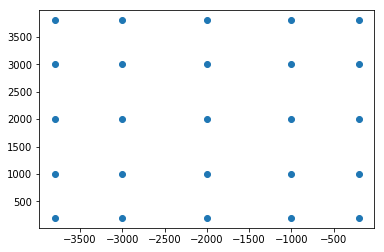

In [289]:
plt.plot(frame_coords[14,:,0], frame_coords[14,:,1], 'o')

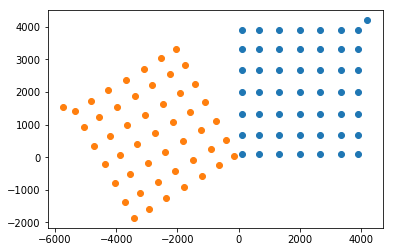

In [216]:
plt.plot(turb_coords[:,0], turb_coords[:,1], 'o')
plt.plot(test1[15,:,0], test1[15,:,1], 'o')

In [279]:
a = np.array(([99, 99],[99,99],[99,99]))#.reshape(2,1)
#a.shape
b = np.array(([100, 1, 10, 100],[100, 100, 90, 100]))
#b.shape
b

array([[100,   1,  10, 100],
       [100, 100,  90, 100]])

In [280]:
np.sum(b, axis =1)

array([211, 390])

In [311]:
c = np.array([1,2,3,4])
d = np.column_stack([c]*4)
d.reshape(4,2,2)

array([[[1, 1],
        [1, 1]],

       [[2, 2],
        [2, 2]],

       [[3, 3],
        [3, 3]],

       [[4, 4],
        [4, 4]]])

In [113]:
wind_resource =  getWindResourceData(r'.\Data\neuquen_asos.txt')[['drct', 'sped']].to_numpy(dtype = np.float32) 
binned_wind   =  binWindResourceData(wind_resource)

binned_wind.shape

C:\Users\Nitin.N.Singh\AppData\Local\Continuum\anaconda3\envs\QGC\lib\site-packages\ipykernel_launcher.py:174: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\Nitin.N.Singh\AppData\Local\Continuum\anaconda3\envs\QGC\lib\site-packages\ipykernel_launcher.py:175: RuntimeWarning: invalid value encountered in less


(12, 15)

In [109]:
idx_foo = np.array([(np.argmin(np.abs(power_curve[:,0] - i))) for i in wind_scenarios[:,0]])
C_t     = np.array([power_curve[i,1] for i in idx_foo])

test1 = C_t.reshape(180,1,1)
np.column_stack([test1]*25).

(180, 25, 1)

In [52]:
slices_drct = [345, 15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]
n_slices_drct = len(slices_drct)

# speed 'slices'
slices_sped = [0., 2., 4., 6., 8., 10., 12., 14., 16., 
               18., 20., 22., 24., 26., 28., 30.]
n_slices_sped = len(slices_sped)

# create wind scenarios. There are two columns in the wind scenarios array
# Column1 - Velocity. Column2 - Direction
wind_scenarios = np.zeros(((n_slices_drct-1)*(n_slices_sped-1),2), dtype=np.float32)
counter = 0
for i in range(n_slices_drct-1):
    for j in range(n_slices_sped-1): 

        wind_sped = slices_sped[j+1]
        wind_drct = 0 if i==0 else (slices_drct[i] + slices_drct[i+1])/2

        wind_scenarios[counter,0] = wind_sped
        wind_scenarios[counter,1] = wind_drct
        counter += 1


# Calculate the wind-frame coords for each direction scenario
# Shape of frame_coords = (15*12, 50, 2)
# downwind(x) & crosswind(y) coordinates for 50 turbines in 180 scenarios
frame_coords   =  np.zeros(((n_slices_drct-1)*(n_slices_sped-1), turb_coords.shape[0], 2))

wind_drct = -1*(90. + wind_scenarios[:,1])

# Convert inflow wind direction from degrees to radians
wind_drct =  (wind_drct)*(np.pi/180)

# Constants to use below
cos_dir = np.cos(wind_drct)
sin_dir = np.sin(wind_drct)

# Convert to downwind(x) & crosswind(y) coordinates
frame_coords[:,:,0] =  np.matmul(cos_dir.reshape(180,1), np.transpose(turb_locs[:,0].reshape(25,1))) + \
                       np.matmul(sin_dir.reshape(180,1), np.transpose(turb_locs[:,1].reshape(25,1)))
frame_coords[:,:,1] = -1*np.matmul(sin_dir.reshape(180,1), np.transpose(turb_locs[:,0].reshape(25,1))) +\
                       np.matmul(cos_dir.reshape(180,1), np.transpose(turb_locs[:,1].reshape(25,1)))
#----------------------------------------------------------------------------------------------------

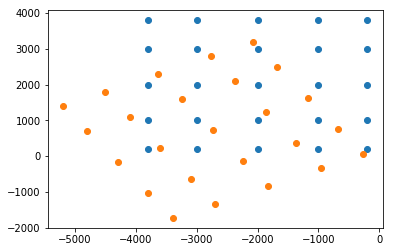

In [55]:
from matplotlib import pyplot as plt
for i in [5,15]:
    plt.plot(frame_coords[i, :,0], frame_coords[i, :,1], 'o')

In [62]:
temp_arr = np.zeros((180,25,25))
for i in range(180):
    x, x_ = np.meshgrid(frame_coords[i,:,0], frame_coords[i,:,0])
    temp_arr[i] = (x-x_)

temp_arr2 = np.zeros((180,25,25))
for i in range(180):
    y, y_ = np.meshgrid(frame_coords[i,:,1], frame_coords[i,:,1])
    temp_arr2[i] = (y-y_)

temp_arr2 = np.abs(temp_arr2)    
# ----------    
# now I have to somehow map the velocity deficit numbers using these two matrices 

velocity_deficit = (1-np.sqrt(1-0.50))*((45/(45 + 0.05*temp_arr))**2)
velocity_deficit[np.where(temp_arr == 0) and np.where(temp_arr2 == 0)] = 0.0
velocity_deficit[np.where(temp_arr < 0)] = 0.0
velocity_deficit[np.where(temp_arr2 > (45 + 0.05*temp_arr))] = 0.0

r"""
# i - target turbine
for i in range(num_turb):
    # impact_on_ibyj - placeholder to calc vel deficit from all turbs on i                 
    impact_on_ibyj = np.zeros(num_turb)    
    # looping over all other turbs to check their effect
    for j in range(num_turb):             
        # Calculate the x-dist and the y-offset 
        # (wrt downwind/crosswind coordinates)
        x = frame_coords.x[i] - frame_coords.x[j]   
        y = frame_coords.y[i] - frame_coords.y[j]   
        # No effect of turbine on itself
        if i!=j:      
            # wake not happening or i outside of the wake region of j                    
            if x<0 or np.abs(y) > (turb_rad + kw*x):  
                impact_on_ibyj[j] = 0
            # at target i, wake is happening due to j
            else:                               
                impact_on_ibyj[j] = (1-np.sqrt(1-C_t))*((turb_rad/(turb_rad + kw*x))**2)

    # Total vel deficit from all upstream turbs, using sqrt of sum of sqrs

    sped_deficit[i] = np.sqrt(np.sum(impact_on_ibyj**2))
"""
velocity_deficit_eff = np.sqrt(np.sum(velocity_deficit**2, axis = 2))

velocity_stacked = np.column_stack([wind_scenarios[:,0]]*25)

vel_eff = velocity_stacked*(1-velocity_deficit_eff)

C:\Users\Nitin.N.Singh\AppData\Local\Continuum\anaconda3\envs\QGC\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


In [67]:
vel_eff.shape
np.argmin(np.abs(power_curve[:,0] - vel_eff[25,9]))

220

In [88]:
idx_foo = np.array([(np.argmin(np.abs(power_curve[:,0] - i))) for i in vel_eff.flatten()])
power   = np.array([power_curve[i,2] for i in idx_foo])
power   = power.reshape(180,25)
power   = np.sum(power, axis=1)

pwr = power*(binned.flatten())
np.sum(pwr)/(360*24)

0.0006936215203478383

In [82]:
binned = binned_wind/np.sum(binned_wind)
binned.shape

(12, 15)

In [233]:
velocity_deficit = np.nan*np.zeros((180,25,25))
velocity_deficit_copy = np.copy(velocity_deficit)
velocity_deficit_copy[np.where(temp_arr < 0)] = 0.0
velocity_deficit_copy[np.where(temp_arr2 > (45 + 0.05*temp_arr))] = 0.0
velocity_deficit_copy[np.where(temp_arr == 0) and np.where(temp_arr2 == 0)] = 0.0
velocity_deficit_copy = (1-np.sqrt(1-0.5))*((45/(45 + 0.05*temp_arr))**2)

In [232]:
velocity_deficit_copy.shape

(180, 25, 25)

In [245]:
A = np.array([[[ 1,  2,  3],[ 4,  5,  6],
    [12, 34, 90], [ 1,  2,  3]],
    [[ 4,  5,  6],[ 2,  5,  6],
    [ 7,  3,  4],[ 1,  2,  3]]])

print(A.shape)

np.sqrt(np.sum(A,axis = 2))

(2, 4, 3)


array([[ 2.44948974,  3.87298335, 11.66190379,  2.44948974],
       [ 3.87298335,  3.60555128,  3.74165739,  2.44948974]])

In [227]:
np.where(temp_arr < 0)

(array([  0,   0,   0, ..., 179, 179, 179], dtype=int64),
 array([ 0,  0,  0, ..., 24, 24, 24], dtype=int64),
 array([ 1,  2,  3, ..., 13, 14, 19], dtype=int64))

In [197]:
xv[0,25:50]

array([ -200.00000874, -1000.00000874, -2000.00000874, -3000.00000874,
       -3800.00000874,  -200.00004371, -1000.00004371, -2000.00004371,
       -3000.00004371, -3800.00004371,  -200.00008742, -1000.00008742,
       -2000.00008742, -3000.00008742, -3800.00008742,  -200.00013113,
       -1000.00013113, -2000.00013113, -3000.00013113, -3800.00013113,
        -200.0001661 , -1000.0001661 , -2000.0001661 , -3000.0001661 ,
       -3800.0001661 ])

In [198]:
frame_coords[1,:,0]

array([ -200.00000874, -1000.00000874, -2000.00000874, -3000.00000874,
       -3800.00000874,  -200.00004371, -1000.00004371, -2000.00004371,
       -3000.00004371, -3800.00004371,  -200.00008742, -1000.00008742,
       -2000.00008742, -3000.00008742, -3800.00008742,  -200.00013113,
       -1000.00013113, -2000.00013113, -3000.00013113, -3800.00013113,
        -200.0001661 , -1000.0001661 , -2000.0001661 , -3000.0001661 ,
       -3800.0001661 ])

In [181]:
frame_coords[0,:,1]

array([ 199.99999126,  199.99995629,  199.99991258,  199.99986887,
        199.9998339 ,  999.99999126,  999.99995629,  999.99991258,
        999.99986887,  999.9998339 , 1999.99999126, 1999.99995629,
       1999.99991258, 1999.99986887, 1999.9998339 , 2999.99999126,
       2999.99995629, 2999.99991258, 2999.99986887, 2999.9998339 ,
       3799.99999126, 3799.99995629, 3799.99991258, 3799.99986887,
       3799.9998339 ])

In [173]:
# direction 'slices' in degrees
slices_drct = [345, 15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]
n_slices_drct = len(slices_drct)

# speed 'slices'
slices_sped = [0., 2., 4., 6., 8., 10., 12., 14., 16., 
               18., 20., 22., 24., 26., 28., 30.]
n_slices_sped = len(slices_sped)

#------------------------------------------------------------------------------
#create wind scenarios. There are two cols. col1 - velocity. col2 - direction
wind_scenarios = np.zeros(((n_slices_drct-1)*(n_slices_sped-1), 2), dtype=np.float32)
counter = 0
for i in range(n_slices_drct-1):
    for j in range(n_slices_sped-1): 

        wind_sped = slices_sped[j+1]
        wind_drct = 0 if i==0 else (slices_drct[i] + slices_drct[i+1])/2

        wind_scenarios[counter,0] = wind_sped
        wind_scenarios[counter,1] = wind_drct
        counter += 1
#------------------------------------------------------------------------------


#---in advance let's also calculate the wind-frame coords for each direction---
wind_drct = -1*(90. + wind_scenarios[:,1])

# Convert inflow wind direction from degrees to radians
wind_drct =  (wind_drct)*(np.pi/180)

# Constants to use below
cos_dir = np.cos(wind_drct)
sin_dir = np.sin(wind_drct)

# Convert to downwind(x) & crosswind(y) coordinates
frame_coords   =  np.zeros(((n_slices_drct-1)*(n_slices_sped-1), turb_coords.shape[0], 2))
frame_coords[:,:,0] =  np.matmul(cos_dir.reshape(180,1), np.transpose(turb_locs[:,0].reshape(25,1))) + \
                       np.matmul(sin_dir.reshape(180,1), np.transpose(turb_locs[:,1].reshape(25,1)))
frame_coords[:,:,1] = -1*np.matmul(sin_dir.reshape(180,1), np.transpose(turb_locs[:,0].reshape(25,1))) +\
                       np.matmul(cos_dir.reshape(180,1), np.transpose(turb_locs[:,1].reshape(25,1)))



In [158]:
turb_locs   =  getTurbLoc(r'C:\Users\Nitin.N.Singh\Desktop\HACK\Internal Hack\Data\turbine_loc_test.csv')
(turb_locs[0,0]*cos_dir).shape

(180,)

In [168]:
frame_coords   =  np.zeros(((n_slices_drct-1)*(n_slices_sped-1), turb_coords.shape[0], 2))
frame_coords.shape

(180, 25, 2)

In [166]:
np.matmul(turb_locs[:,0].reshape(25,1), np.transpose(cos_dir.reshape(180,1))).shape

(25, 180)

In [171]:
frame_coords[:,:,0] = np.matmul(cos_dir.reshape(180,1), np.transpose(turb_locs[:,0].reshape(25,1)))

In [163]:
np.transpose(cos_dir.reshape(180,1)).shape

(1, 180)

In [165]:
turb_locs[:,0].shape

(25,)

In [378]:
# Store number of pts (number of rows in a)
a= np.array([[ 34.45,  14.13,   2.17],
    [ 32.38,  24.43  ,23.12],
    [ 33.19,   3.28  ,39.02],
    [ 36.34,  27.17 , 31.61],
    [ 37.81 , 29.17,  29.94]])
m = a.shape[0]

# Get the first of pairwise indices formed with the pairs of rows from a
# Simpler version, but a bit slow : idx1,_ = np.triu_indices(m,1)
shifts_arr = np.zeros(int(m*(m-1)/2),dtype=int)
shifts_arr[np.arange(m-1,1,-1).cumsum()] = 1
idx1 = shifts_arr.cumsum()

# Get the IDs of pairs of rows that are more than "d" apart and thus select 
# the rest of the rows using a boolean mask created with np.in1d for the 
# entire range of number of rows in a. Index into a to get the selected points.
selected_pts = a[~np.in1d(np.arange(m),idx1[distance.pdist(a) < d])] 

NameError: name 'distance' is not defined

In [377]:
m*(m-1)/2

10.0

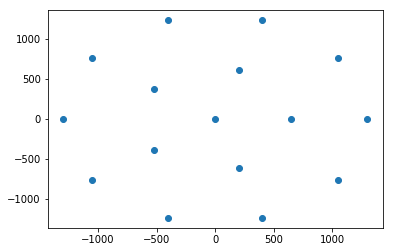

In [359]:
plt.plot(turb_locs[:,0], turb_locs[:,1], 'o')

In [278]:
wind_freq = binned_wind/np.sum(binned_wind)
    
nbins_drct = wind_freq.shape[0]
nbins_sped = wind_freq.shape[1]

slice_drct = np.linspace(0, 360, nbins_drct+1)
slice_sped = np.linspace(0, 30,  nbins_sped+1)

slice_drct
#slice_sped

array([  0. ,  22.5,  45. ,  67.5,  90. , 112.5, 135. , 157.5, 180. ,
       202.5, 225. , 247.5, 270. , 292.5, 315. , 337.5, 360. ])

In [335]:
np.linspace(0, 30,  16) 

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
       26., 28., 30.])

In [281]:
22.5/2

11.25

In [246]:
import mat73 
wf = mat73.loadmat(r'C:\Users\Nitin.N.Singh\Desktop\WFO\MATLAB Evaluator\WindFarmCalculator_Library\WF_OWEZ.mat')
wf = wf['WF']
wf['x']

array([597181.1, 596756.1, 596339.1, 595914.1, 595490.1, 595065.1,
       594633.1, 594208.1, 593783.1, 593366.1, 592933.1, 592508.1,
       598189.1, 597764.1, 597339.1, 596914.1, 596234.1, 595809.1,
       595384.1, 594959.1, 594534.1, 598548.1, 598119.1, 597695.1,
       597038.1, 596560.1, 596135.1, 595710.1, 595285.1, 598868.1,
       598446.1, 597796.1, 597312.1, 596887.1, 596462.1, 596037.1])

In [ ]:
test = 0,30,60,90,120,150,180,210,240,270,300,330

In [286]:
wra = pd.read_csv(r'.\Data\puertonatales_asos.txt') 
df = wra.copy()

for cols in df.columns[1:]:
        df[cols] = pd.to_numeric(df[cols],errors='coerce')
    
r"""Convert miles per hour to meters per second."""
df['sped'] = 0.447*df['sped']

    
# specify the number of bins 
nbins_drct  = 12
nbins_sped  = 15

# temp slices. number 30 is chosen based on the speed distribution
slice_drct = [0,30,60,90,120,150,180,210,240,270,300,330]#np.linspace(0, 360, nbins_drct+1)
slice_sped = np.linspace(0, 30,  nbins_sped+1) 

binned_wind = np.zeros((nbins_drct, nbins_sped))

for iter_i in range(nbins_drct):
    for iter_j in range(nbins_sped):
        if slice_drct[iter_i] == 0:
            lower_limit = 345.0
            higher_limit = 15
        else:
            lower_limit = slice_drct[iter_i]-15
            higher_limit = slice_drct[iter_i] + 15
    
        df_foo = df[(df['drct'] >= lower_limit) 
                    & (df['drct'] < higher_limit)]

        df_foo = df_foo[(df_foo['sped'] >= slice_sped[iter_j]) 
                        & (df_foo['sped'] < slice_sped[iter_j+1])]

        binned_wind[iter_i,iter_j] = df_foo.shape[0] 

binned_wind.shape

(12, 15)

<font color='#9bic31'>

<div style="text-align: center"> 
    
# ** Backup Cells **

</div>

</font>

### Python v Matlab Benchmarking
|Data         |Matlab (TWh)|Python (TWh)|
|-------------|------------|------------|
|ahmedabad    |0.0341      |0.034       |
|hyderabad    |0.0571      |0.057       |
|trivandrum   |0.0387      |0.039       |
|pondicherry  |0.0383      |0.038       |
|riogallegos  |0.31        |0.31        |
|ushuaia      |0.373       |0.376       |
|riogranade   |0.329       |0.33        |
|comodora     |0.295       |0.296       |
|sancarlos    |0.311       |0.31        |
|neuquen      |0.0768      |0.077       |
|mardelplata  |0.133       |0.135       |
|puertonatales|0.39        |0.388       |


In [ ]:
# Vectorized C_t estimation. Excluded from Code
# convert to np array for decreased code run time
# idx_foo = np.array([(np.argmin(np.abs(power_curve[:,0] - i))) for i in wind_sped*(1.-sped_deficit)])
# power   = np.sum(np.array([power_curve[i,2] for i in idx_foo]))

In [ ]:
?? What if the optimization algo is shitty. 

### Estimation of Annual Energy Production (AEP)
The power output of a wind turbine varies with wind speed, and every wind turbine has a characteristic power performance curve. With such a curve, it is possible to predict the energy production of a wind turbine without considering the technical details of its various components. The power curve gives the electrical power output as a function of the hub height wind speed. An important parameter of a power curve is the rated power, which is generally equal to the maximum power output of the electrical generator.

When the wind speed cumulative distribution function and the power curve data are known, the total electrical energy produced by a wind turbine for a specific period can be calculated. The procedure is shown in Figure 2. As a first step, the cumulative distribution function is transformed to probability density function for the wind speed. These data refer to the anemometer height, so they have to be transformed at hub height, using (2). In the wind speed probability density function, the integral between two specific wind speeds denotes the portion of the total time period in which the wind speed lies between these two specific values. In practice, this procedure can be implemented by using the histogram of wind speed. In this paper, the width of wind speed bins has been considered as 0.5 m/s. By knowing the durations at each wind speed bin and the power curve data (i.e., produced electrical power for specific wind speeds), the electrical energy production of a wind turbine can be calculated. In the last diagram of Figure 2, the total wind turbine energy production is equal to the integral of the diagram.

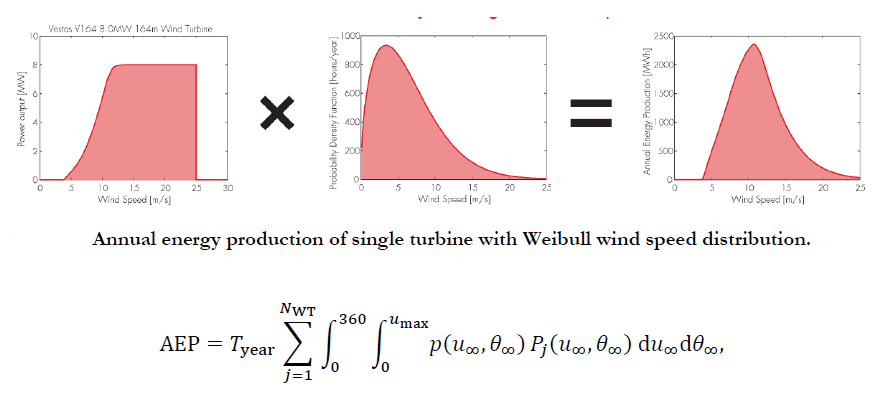

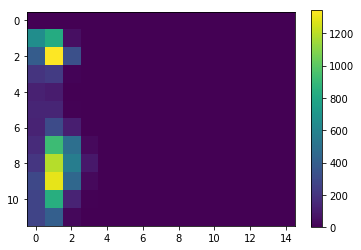

In [329]:
r''' Format IEM data to be input ready to Jasper's Evaluator'''

n_bins_drct = 12; bins_drct_size = int(360/n_bins_drct) 
n_bins_sped = 15; bins_sped_size = int(30/n_bins_sped)

data_array = np.zeros((n_bins_drct, n_bins_sped))

degs = [0,30,60,90,120,150,180,210,240,270,300,330]#np.linspace(0, 360, n_bins_drct+1)
degs = [float(i) for i in degs]
vels = np.linspace(0, 30,  n_bins_sped+1)

#for deg in np.linspace(0, 360, 9):
#    print(deg)
#degs

df = pd.read_csv(r'C:\Users\Nitin.N.Singh\Desktop\HACK\Jupyter\Data\ahmedabad_asos.txt')

for cols in df.columns[1:]:
        df[cols] = pd.to_numeric(df[cols],errors='coerce')
        
df['sped'] = 0.447*df['sped']

for i in range(n_bins_drct):
    for j in range(n_bins_sped):
        
        if degs[i] == 0:
            lower_limit = 345.0
            higher_limit = 15
        else:
            lower_limit = degs[i]-15
            higher_limit = degs[i]+15
            
        df1 = df[(df['drct'] >= lower_limit) 
                    & (df['drct'] < higher_limit)]
        df1 = df1[(df1['sped'] > vels[j]) & (df1['sped'] < vels[j+1])]
        data_array[i,j] = df1.shape[0] 
        #print(df1.shape[0])
        
from matplotlib import pyplot as plt
#plt.figure(figsize=(2,2))
plt.imshow(data_array)
plt.colorbar()

wra = mat73.loadmat(r'C:\Users\Nitin.N.Singh\Desktop\WFO\MATLAB Evaluator\WRAwindrose_OWEZ.mat')
wra = wra['WRAwindrose']

tra = wra.copy()
tra['Data'] = data_array
tra['WindDirectionBinSize'] = bins_drct_size
tra['WindDirectionBins'] = degs[0:]
tra['WindSpeedBinSize']  =  bins_sped_size
tra['WindSpeedBins'] = vels[1:]

dict_to_save= {'WRAwindrose':tra}
dict_to_save
import scipy.io as sio
sio.savemat(r'C:\Users\Nitin.N.Singh\Desktop\WFO\MATLAB Evaluator\WindFarmCalculator_Library'+
            r'\WRAwindrose_OWEZ_ahmedabad_test.mat',
            dict_to_save)

In [ ]:
r'''Quick and Dirty Particle Swarm Optimizer'''

def cost_func(x_):
    #if __name__ == "__main__":
    '''Used for demonstration.
    '''
    temp1   = x_#getTurbLoc('turbineLoc.csv')
    
    #print(x_)
    #turb_coords = np.recarray(36, coordinate)
    #turb_coords.x, turb_coords.y = wf['x'], wf['y']

    turb_coords = np.recarray(10, coordinate)
    turb_coords.x, turb_coords.y = temp1[0:10], temp1[10:20]

    
    turb_specs    =  getTurbSpec('turbineSpec.csv')
    power_curve   =  loadPowerCurve('powerCurve.csv')
    wind_resource =  getWindResourceData('puertonatales_asos.txt') 
    binned_wind   =  binWindResourceData(wind_resource)
    
    totalAEP_ = totalAEP(turb_coords,power_curve,binned_wind,turb_specs)
    
    #print('I am here')
    return(totalAEP_)

def f(x):
    n_particles = x.shape[0]
    j = [1/cost_func(x[i]) for i in range(n_particles)]
    #print(np.array(j))
    return np.array(j)


from pyswarms.single.global_best import GlobalBestPSO

# instatiate the optimizer
x_max = 1500 * np.ones(20)
x_min = -1 * x_max
bounds = (x_min, x_max)

options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=20, dimensions=20, options=options, bounds=bounds)

# now run the optimization, pass a=1 and b=100 as a tuple assigned to args

cost, pos = optimizer.optimize(f, 20)

In [49]:
r''' CR Shapiro Model'''

import numpy as np
from matplotlib import pyplot as plt 

class Jensen:

    def __init__(self, D, s, ustar, z0, zh, phi):
        r'''
        Init arguments:
        D-Appears to be an array or list like item. Could it be the list of turbine dia??
        s-Appears to be a 2D Array. Could be position of the turbines
        phi- Could be an angle. i.e. the angle at which the wind is arriving??
        ustar - free friction velocity?     ### jensen model is assumed to be frictionless
        uinfinity - Undisturbed wind speed?
        zh - Hub height??
        z0 - Roughness height??
        '''

        # Check input arguments
        self.N = np.size(D)
        assert np.size(s,0) == self.N, "s must be size (N,2)"
        assert np.size(s,1) == 2,      "s must be size (N,2)"

        # Assign input arguments
        self.D = D
        self.s = s
        self.ustar = ustar
        self.z0 = z0
        self.zh = zh
        self.phi = phi

        # Rotate arrangement of turbines
        self.ss = s
        self.s = np.zeros(np.shape(s))
        self.s[:,0] = np.cos(self.phi)*self.ss[:,0] + np.sin(self.phi)*self.ss[:,1]
        self.s[:,1] = -np.sin(self.phi)*self.ss[:,0] + np.cos(self.phi)*self.ss[:,1]

        # Freestream velocity and wake expansion
        self.kappa = 0.4    # von Kármán constant (≈0.4)
        self.Uinfty = self.ustar/self.kappa*np.log(self.zh/self.z0) # https://onlinelibrary.wiley.com/doi/full/10.1002/we.1863
        self.kw = self.ustar/self.Uinfty*np.ones(self.N)         #kw is called Jensen wake decay constant in the text. 
        # this is the definition of kw


        # x-grid for computing deficits
        self.x = np.unique(self.s[:,0])
        self.Nx = np.size(self.x)

        # Grid for disk-averaging
        Nys = 32
        Nzs = 32
        yy, zz = np.meshgrid(np.linspace(-1, 1, Nys), np.linspace(-1, 1, Nzs))
        yy = yy.flatten()
        zz = zz.flatten()
        r = np.sqrt(yy**2 + zz**2)
        yy = yy[r<1]
        zz = zz[r<1]
        self.Ns = np.size(yy)
        self.ys = np.zeros((self.N, self.Ns))
        self.zs = np.zeros((self.N, self.Ns))
        for i in range(0, self.N):
            self.ys[i,:] = yy*0.5*self.D[i]
            self.zs[i,:] = zz*0.5*self.D[i]

        # Initialize other values
        self.Ctp = np.zeros(self.N)
        self.ud  = np.ones(self.N)*self.Uinfty          #this is disk-averaged velocity across the turbine blade??
        self.P   = np.zeros(self.N)


    def calc(self, Ctp, developing=False, kwi=0.05):
        # check input arguments and assign
        assert np.size(Ctp) == self.N, "Ctp must be size N"
        self.Ctp = Ctp

        # Get velocity deficits
        for j in range(0, self.N):
            u = np.zeros(self.Ns)
            Nw = 0
            for i in np.arange(0, self.N)[self.s[j,0]>self.s[:,0]]:
                Dw = self.D[i] + 2*self.kw[i]*(self.s[j,0]-self.s[i,0])
                a = self.Ctp[i]/(4+self.Ctp[i])
                du = 2*self.Uinfty*a/(Dw/self.D[i])**2
                ind = (self.ys[i,:] + self.s[i,1] - self.s[j,1])**2 +          \
                    (self.zs[i,:])**2  < 0.25*Dw**2
                u[ind] += du**2
                if (np.sum(ind) > 0):
                    Nw+=1

            if developing:
                self.kw[j] = kwi + (self.ustar/self.Uinfty - kwi)*np.exp(-Nw)

            self.ud[j] = (self.Uinfty - np.mean(np.sqrt(u)))                   \
                * (1.0 - self.Ctp[j]/(4+Ctp[j]))

        self.P = 0.5*self.Ctp*self.ud**3






In [1247]:
wf = mat73.loadmat(r'C:\Users\Nitin.N.Singh\Desktop\WFO\MATLAB Evaluator\WF_OWEZ.mat')
wf = wf['WF']

r"""
tra = wra.copy()
tra['Data'] = data_array
tra['WindDirectionBinSize'] = bins_drct_size
tra['WindDirectionBins'] = degs[0:-1]
tra['WindSpeedBinSize']  =  bins_sped_size
tra['WindSpeedBins'] = vels[1:]

dict_to_save= {'WRAwindrose':tra}
dict_to_save
import scipy.io as sio
sio.savemat(r'C:\Users\Nitin.N.Singh\Desktop\WFO\MATLAB Evaluator\WindFarmCalculator_Library\WRAwindrose_OWEZ_test.mat',
            dict_to_save)
"""   
#wf['x'] = turb_coords.x.reshape(16,1)
#wf['y'] = turb_coords.y.reshape(16,1)
#dict_to_save= {'WF':wf}
#dict_to_save
#import scipy.io as sio
#sio.savemat(r'C:\Users\Nitin.N.Singh\Desktop\WFO\MATLAB Evaluator\WindFarmCalculator_Library\WF_test.mat',
#            dict_to_save)

"\ntra = wra.copy()\ntra['Data'] = data_array\ntra['WindDirectionBinSize'] = bins_drct_size\ntra['WindDirectionBins'] = degs[0:-1]\ntra['WindSpeedBinSize']  =  bins_sped_size\ntra['WindSpeedBins'] = vels[1:]\n\ndict_to_save= {'WRAwindrose':tra}\ndict_to_save\nimport scipy.io as sio\nsio.savemat(r'C:\\Users\\Nitin.N.Singh\\Desktop\\WFO\\MATLAB Evaluator\\WindFarmCalculator_Library\\WRAwindrose_OWEZ_test.mat',\n            dict_to_save)\n"

In [1248]:
wf['x']

array([597181.1, 596756.1, 596339.1, 595914.1, 595490.1, 595065.1,
       594633.1, 594208.1, 593783.1, 593366.1, 592933.1, 592508.1,
       598189.1, 597764.1, 597339.1, 596914.1, 596234.1, 595809.1,
       595384.1, 594959.1, 594534.1, 598548.1, 598119.1, 597695.1,
       597038.1, 596560.1, 596135.1, 595710.1, 595285.1, 598868.1,
       598446.1, 597796.1, 597312.1, 596887.1, 596462.1, 596037.1])

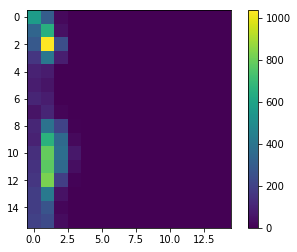

In [124]:
dict_to_save

{'WRAwindrose': {'Data': array([[  0., 572., 231.,  56.,  29.,  15.,   2.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.],
         [  0., 337., 468., 122.,  83.,  23.,   1.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.],
         [  0., 288., 547., 274., 349., 107.,   8.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.],
         [  0., 163., 219.,  94., 147.,  36.,   3.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.],
         [  0., 101.,  75.,   2.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.],
         [  0.,  82.,  52.,   7.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.],
         [  0., 109.,  60.,  18.,   4.,   2.,   1.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.],
         [  0.,  55.,  79.,  14.,  25.,   4.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.],
         [  0., 113., 189., 117., 193.,  91.,  17.,   1.,   1.,   0.,   0.,
            0

## Jensen's Model based on Jasper's Matlab Code
I believe I have some wind data and I get turbine data from Jasper. This can be enough for me to build model and begin testing the approaches. I however expect multiple challenges which I will discover along the way.

    - First run it with Jasper's Data
    - Expect challenges in Wind Farma Calculator p-coded file

In [179]:
def Load_Options():
    
    PlotFigures    = True
    PlotDuringCalc = True
    
    WFname  = 'OWEZ'
    WTname  = ''
    
    WRAname = 'WRAwindrose_OWEZ'
    
    # Resolution Postprocessing
    nn = 300
    
    Wake = 2
    
    kw = 0.05
    
    r'''Challenge. p-coded file here. What to do?'''
    #Load_Cubature(Models)
    
    return(Options,Settings)

In [14]:
import mat73

def Load_WRA():#Options,Settings):
    #load([Settings.WRAname '.mat'])
    # wind resource data
    # have to adappt to the instructured data that I have
    wra = mat73.loadmat(r'C:\Users\Nitin.N.Singh\Desktop\WFO\MATLAB Evaluator\WRAwindrose_OWEZ.mat')
    wra = wra['WRAwindrose']
    
    WindSpeeds     = WRAwindrose.WindSpeedBins;
    WindDirections = WRAwindrose.WindDirectionBins;
    AEP_Frequency  = WRAwindrose.Data/sum(sum(WRAwindrose.Data));

    #%% Checks

    #% Atmospheric turbulence Intensity
    TurbulenceIntensity = 0.077;

    #% Air density
    AirDensity = 1.225;
    
#Settings.WRAname
#Settings.WFname

In [17]:
def Load_WindFarm():#(Options,Settings)
    # info about wind famr positioning
    wf = mat73.loadmat(r'C:\Users\Nitin.N.Singh\Desktop\WFO\MATLAB Evaluator\WF_OWEZ.mat')
    wf = wf['WF']

    #if ~isempty(char(Settings.WTname))
    #    WF.WT = Settings.WTname;
    #    disp('Default wind turbine types replaced by prescribed turbine types.')
    #end

In [4]:
def Coordinates_WTinWF():#WF,WT,Options)
    OriginTurbine = 1
    WTD = WT.Diameter*ones(WF.NrWT,1);
    
    WF.X = (WF.x-WF.x(WF.OriginTurbine))/max(WTD);
    WF.Y = (WF.y-WF.y(WF.OriginTurbine))/max(WTD);

    WF.NonDimDiam = WTD/max(WTD);

In [25]:
def PlotFigures():  # Pre and Post
    # seems like an easy function
    # should be easier with Python
    # 3 subplots etc.
    # will figure out details about what goes on in 
    # those plots
    # For now focus on getting the calculations right. 
    
    return()





r''' Matlab Code'''
function f = calcvel(i,j)

def calcvel(i, j, windfarm, alpha, a , U0, Aj, Dj):
    #Calculate incident velocity on any turbine
    #Wake model calculation
    pwrcent = 0;
    dwind = j;
    dcord = windfarm(dwind,:);
    for k = 1:1:numel(i)

        upwind = i(k);
        ucord = windfarm(upwind,:);
        xdistance = ucord(1)-dcord(1);
        Dwake = Dj + (2*alpha*abs(xdistance)); % Wake radius
        [xout,yout] = circcirc(dcord(2),dcord(1),Dj/2,ucord(2),ucord(1),Dwake/2);
        if isequalwithequalnans(xout, [NaN,NaN])==1 &&  isequalwithequalnans(yout, [NaN,NaN])==1
            Akj = Aj; % Complete overlap
        else
            rk = pi*Dwake^2/4;
            Ak = (rk^2*acos((xdistance^2+rk^2-Aj^2)/(2*xdistance*rk))+...
        Aj^2*acos((xdistance^2+Aj^2-rk^2)/(2*xdistance*Aj))...
        -0.5*sqrt((-xdistance+rk+Aj)*(xdistance-rk+Aj)*(xdistance+rk-Aj)*(xdistance+rk+Aj)));
            Akj= Ak; % Partial overlap
        end
        Ukj = U0*(1 - (2*a/(1+alpha*xdistance/27.87)^2));
        pwrcent = pwrcent+Akj*(U0-Ukj)^2/Aj;
    end

    %% Total wake energy loss
    sigma = pwrcent;
    f = U0 - sqrt(sigma);

In [231]:
HTML('''<script><img src="/offshore-farm.png" width=60 height=60 />''')

NameError: name 'HTML' is not defined

In [ ]:
To do log:
- jensen versions
- how to account for wind directions
- how to calculate energy output




Turbine specification Data:
1. Name
2. Vendor
3. Type
4. Diameter (m)
5. RotorArea (m2)
6. Hub Height (m)
7. CutIn
8. CutOut
9. RatedWindSpeed
10. RatedPower

Thrust Coeffecient Lookup Data:
1. FreeWindSpeed
2. Power
3. ThrustCoeff

In [1127]:
turb_spec = [{'Name':'Vestas_V90_3MW'}, {'Vendor':'Vestas'}, {'Type':'V90-3.0'}, {'Dia (m)':90.0}, 
             {'Rotor Area (m2)':6.361e3}, {'Hub Height (m)':70.0}, {'Cut-in Wind Speed (m/s)':3.5}, 
             {'Cut-out Wind Speed (m/s)':25.0}, {'Rated Wind Speed (m/s)':15.0}, {'Rated Power (MW)': 3.0}]

columns = []
values  = []
for dict_ in turb_spec:
    #print(dicts)
    for key, value in dict_.items():
        columns.append(key)
        values.append(value)
        

with open('turbineSpec.csv', 'w', newline = '') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(columns)
    writer.writerow(values)

In [1136]:
import mat73
test_matFile = mat73.loadmat(r'C:\Users\Nitin.N.Singh\Desktop\WFO\MATLAB Evaluator\WT_Vestas_V90_3MW.mat')
windSpeed = test_matFile['WT']['FreeWindSpeed']
thrustCoeff = test_matFile['WT']['ThrustCoeff']
power = test_matFile['WT']['Power']/1000


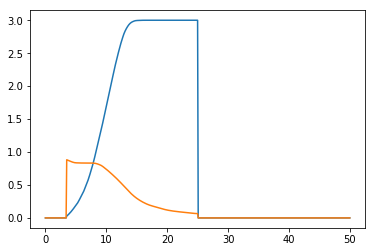

In [1135]:
plt.plot(windSpeed, power/1000)
plt.plot(windSpeed, thrustCoeff)

In [1138]:
with open('powerCurve.csv', 'w', newline = '') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Wind Speed (m/s)', 'Thrust Coeffecient', 'Power (MW)'])
    
    for row in zip(windSpeed, thrustCoeff, power):
        writer.writerow(row)
        

     

In [1112]:
temp2

['Vestas_V90_3MW', 'Vestas', 'V90-3.0', 90, 6361.0, 70, 3.5, 25, 15, 3.0]

In [1116]:
temp

['Name',
 'Vendor',
 'Type',
 'Dia (m)',
 'Rotor Area (m2)',
 'Hub Height (m)',
 'Cut-in Wind Speed (m/s)',
 'Cut-out Wind Speed (m/s)',
 'Rated Wind Speed (m/s)',
 'Rated Power (MW)']

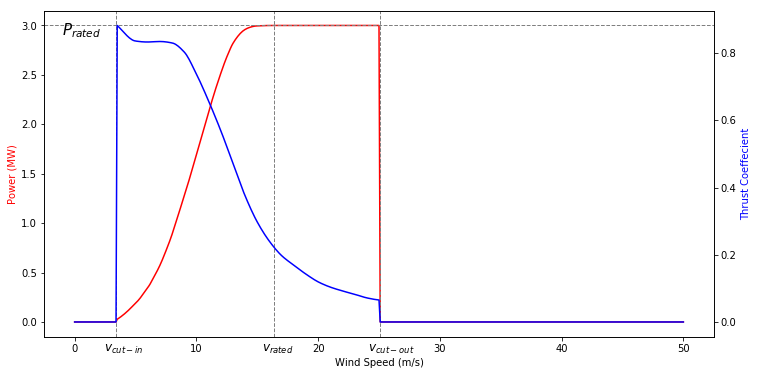

In [193]:
power_curve = pd.read_csv(r'C:\Users\Nitin.N.Singh\Desktop\HACK\Jupyter\powerCurve.csv')

plt.figure(figsize=(12,6))
plt.plot(power_curve['Wind Speed (m/s)'], power_curve['Power (MW)'], color = 'r')
plt.axvline(x=3.4,color='gray', linestyle='--', lw = 1)
plt.axvline(x=16.4,color='gray', linestyle='--', lw = 1)
plt.axvline(x=25.1,color='gray', linestyle='--', lw = 1)
plt.axhline(y=3.0,color='gray', linestyle='--', lw = 1)
plt.text(3.4-1,-0.3,'$v_{cut-in}$', size = 12)
plt.text(16.4-1,-0.3,'$v_{rated}$', size = 12)
plt.text(25.1-1,-0.3,'$v_{cut-out}$', size = 12)
plt.text(-1,2.9,'$P_{rated}$', size = 15)

ax = plt.gca()

ax2 = ax.twinx()

ax2.plot(power_curve['Wind Speed (m/s)'], power_curve['Thrust Coeffecient'], color = 'b')

ax.set_ylabel('Power (MW)', color='r')
ax.set_xlabel('Wind Speed (m/s)', color='k')
ax2.set_ylabel('Thrust Coeffecient', color='b')


plt.savefig(r'C:\Users\Nitin.N.Singh\Desktop\HACK\Problem Statement\images\power_curve.png')

\begin{array}
\hline \text { Variable } & \text { Value } & \text { Definition } \\
\hline \Delta V / V_{\infty} & \text { Eq. (1) } & \text { Normalized wake velocity deficit } \\
C_{T} & 8 / 9 & \text { Thrust coefficient } \\
x_{i}-x_{g} & - & \text { Dist. from hub generating wake }\left(x_{g}\right) \text { to hub of interest }\left(x_{i}\right), \text { along freestream } \\
y_{i}-y_{g} & - & \text { Dist. from hub generating wake }\left(y_{g}\right) \text { to hub of interest }\left(y_{i}\right), \perp \text { to freestream } \\
\sigma_{y} & \text { Eq. }(2) & \text { Standard deviation of the wake deficit } \\
k_{y} & 0.0324555 & \text { Variable based on a turbulence intensity of } 0.075[1,2] \\
D & 130 \mathrm{m} & \text { Turbine diameter }[3] \\
\hline
\end{array}

# CREATING DATASETS FOR HACKATHON

In [410]:
# Testing the datasets

for num in range(2005, 2020):
  #if num != 2011:
    df = pd.read_csv(r'C:\Users\Nitin.N.Singh\Desktop\HACK\Final Datasets\Benbecula\{0}.txt'.format(num))

    for cols in df.columns[2:]:
        df[cols] = pd.to_numeric(df[cols],errors='coerce')
    
    idx_drctNan = df['drct'].index[df['drct'].apply(np.isnan)]
    idx_spedNan = df['sped'].index[df['sped'].apply(np.isnan)]

    idx_toFilter = list(set(idx_drctNan.tolist() + idx_spedNan.tolist()))
    
    df1 = df.drop(df.index[idx_toFilter]).reset_index(drop=True)
    
    print(num, 'Rows in Original df ', df.shape[0], ' rows in filtered df ', df1.shape[0], ' filtered', len(idx_toFilter))
    
    ax = WindroseAxes.from_ax(fig=plt.figure(figsize=(7,7)))
    ax.bar(df1['drct'], 0.447*df1['sped'], nsector = 36, normed=True, bins=np.arange(0, 30, 2), opening=1.2, edgecolor=None)

    ax.set_legend(loc="right",borderaxespad = -10, shadow = True)#; plt.show()

    plt.savefig(r'C:\Users\Nitin.N.Singh\Desktop\HACK\Final Datasets\Benbecula\Windroses\{0}.png'.format(num))
    plt.close()

2005 Rows in Original df  15292  rows in filtered df  13606  filtered 1686
2006 Rows in Original df  16173  rows in filtered df  16045  filtered 128
2007 Rows in Original df  16099  rows in filtered df  15980  filtered 119
2008 Rows in Original df  16876  rows in filtered df  16633  filtered 243
2009 Rows in Original df  16695  rows in filtered df  16530  filtered 165
2010 Rows in Original df  17038  rows in filtered df  16818  filtered 220
2011 Rows in Original df  16877  rows in filtered df  16732  filtered 145
2012 Rows in Original df  17089  rows in filtered df  16800  filtered 289
2013 Rows in Original df  16827  rows in filtered df  16640  filtered 187
2014 Rows in Original df  16891  rows in filtered df  16741  filtered 150
2015 Rows in Original df  16887  rows in filtered df  16777  filtered 110
2016 Rows in Original df  16586  rows in filtered df  16301  filtered 285
2017 Rows in Original df  16315  rows in filtered df  16141  filtered 174
2018 Rows in Original df  16766  rows

In [384]:
from scipy import linalg, mat, dot
import matplotlib

for num in range(2005, 2020):
  #if num != 2011:
    df = pd.read_csv(r'C:\Users\Nitin.N.Singh\Desktop\HACK\Final Datasets\Benbecula\{0}.txt'.format(num))

    for cols in df.columns[2:]:
        df[cols] = pd.to_numeric(df[cols],errors='coerce')
    
    idx_drctNan = df['drct'].index[df['drct'].apply(np.isnan)]
    idx_spedNan = df['sped'].index[df['sped'].apply(np.isnan)]

    idx_toFilter = list(set(idx_drctNan.tolist() + idx_spedNan.tolist()))
    
    df1 = df.drop(df.index[idx_toFilter]).reset_index(drop=True)
    
    #print(num, 'Rows in Original df ', df.shape[0], ' rows in filtered df ', df1.shape[0], ' filtered', len(idx_toFilter))
    
    wind_resource = df1[['drct', 'sped']].to_numpy(dtype = np.float32)
    
    # direction 'slices' in degrees
    # slices_drct = [345, 15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]
    slices_drct = [355, 5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 
                   135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 
                   255, 265, 275, 285, 295, 305, 315, 325, 335, 345]
    n_slices_drct = len(slices_drct)
    
    # speed 'slices'
    slices_sped = [0., 2., 4., 6., 8., 10., 12., 14., 16., 
                   18., 20., 22., 24., 26., 28., 30.]
    n_slices_sped = len(slices_sped)

    
    # placeholder for binned wind
    binned_wind = np.zeros((n_slices_drct - 1, n_slices_sped - 1), 
                           dtype = np.float32)
    
    # 'trap' data points inside the bins. 
    for i in range(n_slices_drct-1):
        for j in range(n_slices_sped-1):  
            if i == 0:
                foo = np.vstack((wind_resource[(wind_resource[:,0] >= slices_drct[i])],
                                 wind_resource[(wind_resource[:,0] <  slices_drct[i+1])]))
            else:    
                foo = wind_resource[(wind_resource[:,0] >= slices_drct[i]) 
                      & (wind_resource[:,0] <  slices_drct[i+1])]

            foo = foo[(foo[:,1] >= slices_sped[j]) 
                          & (foo[:,1] <  slices_sped[j+1])]
            
            binned_wind[i,j] = foo.shape[0] 
     
    binned_wind = binned_wind/np.sum(binned_wind)
    # print(np.min(binned_wind[binned_wind>0]), np.max(binned_wind))
    plt.figure(figsize=(12,12))
    plt.imshow(binned_wind, norm=matplotlib.colors.LogNorm(vmin=5e-5, vmax=0.05), cmap='viridis'); plt.colorbar()        
    plt.savefig(r'C:\Users\Nitin.N.Singh\Desktop\HACK\Final Datasets\Benbecula\Binned Winds\{0}.png'.format(num))
    plt.close()

In [382]:
binned_wind[:,0]

array([0.01567097, 0.00051171, 0.00063963, 0.00057567, 0.00051171,
       0.00095945, 0.00070359, 0.00070359, 0.00070359, 0.00076756,
       0.00083152, 0.00095945, 0.00051171, 0.00070359, 0.00095945,
       0.00076756, 0.00089548, 0.00108737, 0.00063963, 0.00038378,
       0.        , 0.00051171, 0.00031982, 0.00051171, 0.00051171,
       0.        , 0.00019189, 0.00019189, 0.00025585, 0.00012793,
       0.00044774, 0.00019189, 0.00019189, 0.00038378, 0.00057567],
      dtype=float32)

In [176]:
df1.drct.unique()

array([230., 290., 250., 320., 360., 340.,   0., 180.,  90., 240., 300.,
       310., 270., 200.,  10.,  30.,  50.,  40.,  80., 100., 110.,  70.,
       160.,  20., 260., 280., 220., 210., 150., 330., 350., 140., 259.,
       170., 190., 130., 120.,  60., 288., 245.])

In [143]:
ls = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]

import random
ls1 = random.sample(ls, 5)
print(ls1)

ls2 = [x for x in ls if x not in ls1]
ls3 = random.sample(ls2, 3)
print(ls3)

print([x for x in ls if x not in ls1 + ls3])

[2006, 2005, 2004, 2003, 2008]
[2007, 2009, 2010]
[2000, 2001, 2002]


In [329]:
#for num in ls:
for num in range(2005,2020):
    df = pd.read_csv(r'C:\Users\Nitin.N.Singh\Desktop\HACK\Final Datasets\Benbecula\{0}.txt'.format(num))

    for cols in df.columns[2:]:
        df[cols] = pd.to_numeric(df[cols],errors='coerce')
    
    idx_drctNan = df['drct'].index[df['drct'].apply(np.isnan)]
    idx_spedNan = df['sped'].index[df['sped'].apply(np.isnan)]

    idx_toFilter = list(set(idx_drctNan.tolist() + idx_spedNan.tolist()))
    
    df1 = df.drop(df.index[idx_toFilter]).reset_index(drop=True)
    
    print(num, '***', np.sort(df1.drct.unique()), len(df1.drct.unique()), '\n')

2005 *** [  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190. 200. 210. 220. 230. 240. 250. 260. 270.
 280. 290. 300. 310. 320. 330. 340. 350. 360.] 37 

2006 *** [  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190. 200. 210. 220. 230. 240. 250. 260. 270.
 280. 290. 300. 310. 320. 330. 340. 350. 360.] 37 

2007 *** [  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190. 200. 210. 220. 230. 240. 250. 260. 270.
 280. 290. 300. 310. 320. 330. 340. 350. 360.] 37 

2008 *** [  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190. 200. 210. 220. 230. 240. 250. 260. 270.
 280. 290. 300. 310. 320. 330. 340. 350. 360.] 37 

2009 *** [  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190. 200. 210. 220. 230. 240. 250. 260. 270.
 280. 290. 300. 310. 320. 330. 340. 3

In [140]:
15*-45
45*-75 --- (50, 60)


[2003, 2000, 2007, 2004, 2002, 2005, 2001, 2006]

In [11]:
import datetime
today = datetime.datetime.now() + datetime.timedelta(minutes = 10)
print(today.strftime("%Y-%m-%d %H:%M"))

2020-07-29 19:13


In [14]:
datetime.datetime.strptime('26 Sep 2012', '%d %b %Y').strftime("%Y-%m-%d %H:%M")

'2012-09-26 00:00'

In [19]:
(datetime.datetime.strptime('01 Jan {0}'.format(2015), '%d %b %Y')+ datetime.timedelta(minutes = 20)).strftime("%Y-%m-%d %H:%M")

'2015-01-01 00:20'

In [26]:
import numpy as np
years_array = np.arange(2005, 2020)
years_array = years_array.tolist()

In [29]:
import random
ls = random.sample(years_array, 10)
ls

[2010, 2014, 2013, 2009, 2008, 2015, 2019, 2011, 2007, 2018]

In [35]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Nitin.N.Singh\Desktop\HACK\Final Datasets\Benbecula\2010.txt')
for cols in df.columns[2:]:
    df[cols] = pd.to_numeric(df[cols],errors='coerce')
df['valid'].iloc[0]    

'2010-01-01 00:20'

In [43]:
date1 = (datetime.datetime.strptime('01 Jan 2010', '%d %b %Y')+ datetime.timedelta(minutes = 20))
date1_str = date1.strftime("%Y-%m-%d %H:%M")

In [44]:
date1

datetime.datetime(2010, 1, 1, 0, 20)

In [45]:
date1_str

'2010-01-01 00:20'

In [162]:
import cma
help(cma)

Help on package cma:

NAME
    cma

DESCRIPTION
    Package `cma` implements the CMA-ES (Covariance Matrix Adaptation
    Evolution Strategy).
    
    CMA-ES is a stochastic optimizer for robust non-linear non-convex
    derivative- and function-value-free numerical optimization.
    
    This implementation can be used with Python versions >= 2.6, namely
    2.6, 2.7, 3.3, 3.4, 3.5, 3.6.
    
    CMA-ES searches for a minimizer (a solution x in :math:`R^n`) of an
    objective function f (cost function), such that f(x) is minimal.
    Regarding f, only a passably reliable ranking of the candidate
    solutions in each iteration is necessary. Neither the function values
    itself, nor the gradient of f need to be available or do matter (like
    in the downhill simplex Nelder-Mead algorithm). Some termination
    criteria however depend on actual f-values.
    
    The `cma` module provides two independent implementations of the
    CMA-ES algorithm in the classes `cma.CMAEvolutionSt

In [202]:
ls = [2006, 2007, 2008, 2009, 2011, 2013, 2014, 2015, 2016, 2017]

import random
ls1 = random.sample(ls, 7)
print(ls1)

ls2 = [x for x in ls if x not in ls1]
ls3 = random.sample(ls2, 3)
print(ls3)

# print([x for x in ls if x not in ls1 + ls3])

[2007, 2008, 2016, 2017, 2011, 2013, 2015]
[2009, 2014, 2006]


In [203]:
import cma
cma.CMAOptions() 

{'AdaptSigma': 'True  # or False or any CMAAdaptSigmaBase class e.g. CMAAdaptSigmaTPA, CMAAdaptSigmaCSA',
 'CMA_active': 'True  # negative update, conducted after the original update',
 'CMA_cmean': '1  # learning rate for the mean value',
 'CMA_const_trace': 'False  # normalize trace, 1, True, "arithm", "geom", "aeig", "geig" are valid',
 'CMA_diagonal': '0*100*N/popsize**0.5  # nb of iterations with diagonal covariance matrix, True for always',
 'CMA_eigenmethod': 'np.linalg.eigh  # or cma.utilities.math.eig or pygsl.eigen.eigenvectors',
 'CMA_elitist': 'False  #v or "initial" or True, elitism likely impairs global search performance',
 'CMA_injections_threshold_keep_len': '0  #v keep length if Mahalanobis length is below the given relative threshold',
 'CMA_mirrors': 'popsize < 6  # values <0.5 are interpreted as fraction, values >1 as numbers (rounded), otherwise about 0.16 is used',
 'CMA_mirrormethod': '2  # 0=unconditional, 1=selective, 2=selective with delay',
 'CMA_mu': 'None 